In [2]:
pip install pandas

Note: you may need to restart the kernel to use updated packages.


In [3]:
pip install pandas

Note: you may need to restart the kernel to use updated packages.


In [48]:
import pandas as pd
df=pd.read_csv("C:/Users/DELL/Desktop/HOME CREDIT EDA/application_train.csv")

In [49]:
df

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
307506,456251,0,Cash loans,M,N,N,0,157500.0,254700.0,27558.0,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
307507,456252,0,Cash loans,F,N,Y,0,72000.0,269550.0,12001.5,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
307508,456253,0,Cash loans,F,N,Y,0,153000.0,677664.0,29979.0,...,0,0,0,0,1.0,0.0,0.0,1.0,0.0,1.0
307509,456254,1,Cash loans,F,N,Y,0,171000.0,370107.0,20205.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0


In [50]:
import pandas as pd

In [51]:
df.shape

(307511, 122)

In [52]:
default_rate=df['TARGET'].mean()*100


In [53]:
default_rate

np.float64(8.072881945686495)

In [54]:
category_counts=df['TARGET'].value_counts()

In [55]:
category_counts

TARGET
0    282686
1     24825
Name: count, dtype: int64

In [6]:
import matplotlib.pyplot as plt

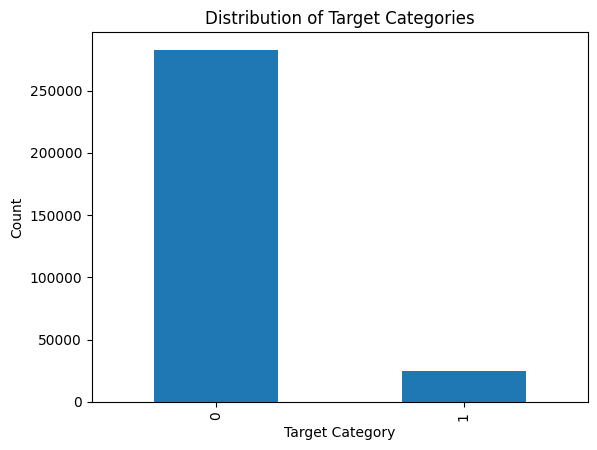

In [56]:
category_counts.plot(kind='bar')
plt.xlabel('Target Category')
plt.ylabel('Count')
plt.title('Distribution of Target Categories')
plt.show()

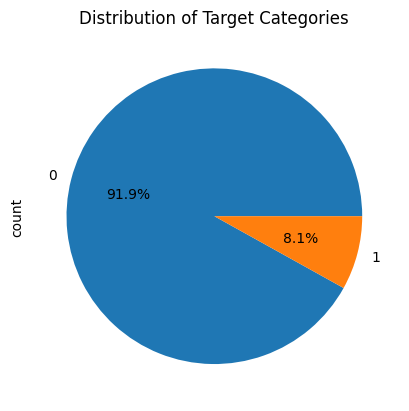

In [22]:
category_counts.plot(kind='pie',autopct='%1.1f%%')
plt.title('Distribution of Target Categories')
plt.show()

In [23]:
default_rate = df.groupby('NAME_CONTRACT_TYPE')['TARGET'].mean().reset_index()
default_rate.columns = ['Loan Type', 'Default Rate']
print(default_rate)

         Loan Type  Default Rate
0       Cash loans      0.083459
1  Revolving loans      0.054783


In [25]:
loan_distribution = df['NAME_CONTRACT_TYPE'].value_counts()

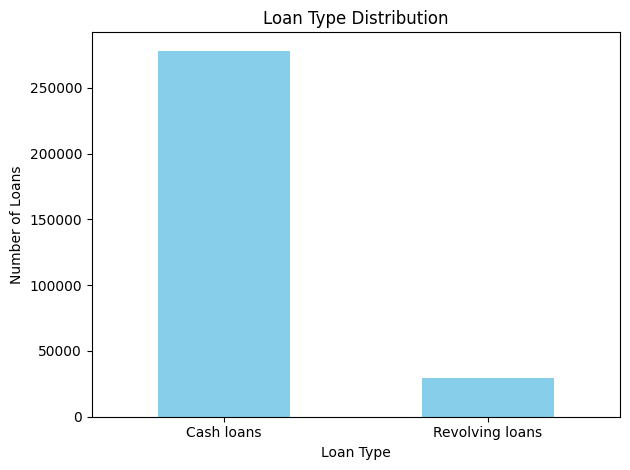

In [26]:
loan_distribution.plot(kind='bar', color='skyblue', title='Loan Type Distribution')
plt.xlabel('Loan Type')
plt.ylabel('Number of Loans')
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

In [30]:
loan_default = df.groupby('NAME_CONTRACT_TYPE')['TARGET'].agg(['mean', 'count']).reset_index()
loan_default.columns = ['NAME_CONTRACT_TYPE', 'Default_Rate', 'Total_Loans']


In [33]:
default_rate_by_type = df.groupby('NAME_CONTRACT_TYPE')['TARGET'].mean().reset_index()
default_rate_by_type = default_rate_by_type.rename(columns={'TARGET': 'Default_Rate'})
print(default_rate_by_type)

  NAME_CONTRACT_TYPE  Default_Rate
0         Cash loans      0.083459
1    Revolving loans      0.054783


In [35]:
pip install seaborn

  Using cached seaborn-0.13.2-py3-none-any.whl.metadata (5.4 kB)
Using cached seaborn-0.13.2-py3-none-any.whl (294 kB)
Note: you may need to restart the kernel to use updated packages.


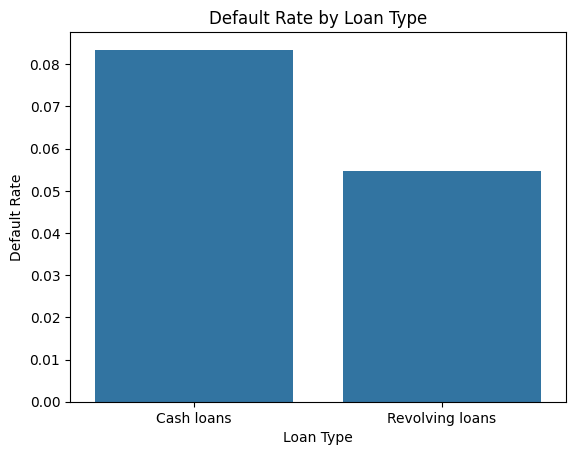

In [38]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.barplot(
    data=default_rate_by_type,
    x='NAME_CONTRACT_TYPE',
    y='Default_Rate'
)
plt.title('Default Rate by Loan Type')
plt.xlabel('Loan Type')
plt.ylabel('Default Rate')
plt.show()

In [39]:
##6th

gender_counts = df['CODE_GENDER'].value_counts()
gender_percent = df['CODE_GENDER'].value_counts(normalize=True) * 100


C:\Users\DELL\AppData\Local\Temp\ipykernel_8896\17792636.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='CODE_GENDER', order=gender_counts.index, palette='pastel')


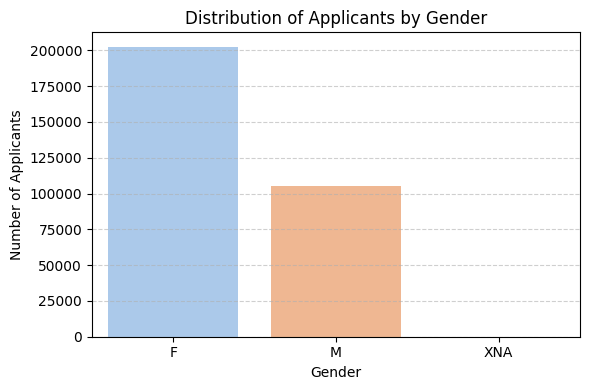

In [40]:
plt.figure(figsize=(6, 4))
sns.countplot(data=df, x='CODE_GENDER', order=gender_counts.index, palette='pastel')
plt.title('Distribution of Applicants by Gender')
plt.xlabel('Gender')
plt.ylabel('Number of Applicants')
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()

In [41]:
###7 
df = df[df['CODE_GENDER'].isin(['F', 'M'])]

In [42]:
gender_default = df.groupby('CODE_GENDER')['TARGET'].agg(['mean', 'count']).reset_index()
gender_default.columns = ['Gender', 'Default_Rate', 'Total_Applicants']

C:\Users\DELL\AppData\Local\Temp\ipykernel_8896\3943084433.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=gender_default, x='Gender', y='Default_Rate', palette='coolwarm')


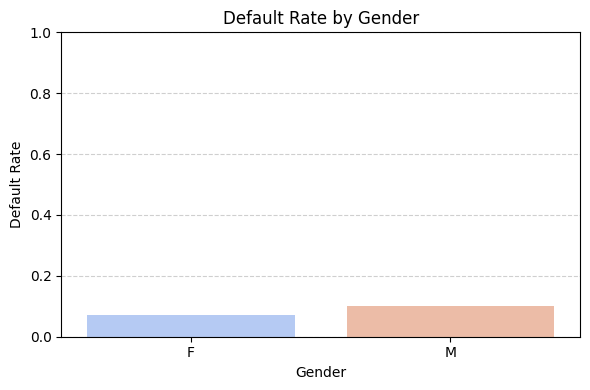

In [43]:
plt.figure(figsize=(6, 4))
sns.barplot(data=gender_default, x='Gender', y='Default_Rate', palette='coolwarm')
plt.title('Default Rate by Gender')
plt.ylabel('Default Rate')
plt.xlabel('Gender')
plt.ylim(0, 1)
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()


In [44]:
### 8
df['AGE'] = (-df['DAYS_BIRTH']) // 365 

C:\Users\DELL\AppData\Local\Temp\ipykernel_8896\3819614482.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['AGE'] = (-df['DAYS_BIRTH']) // 365


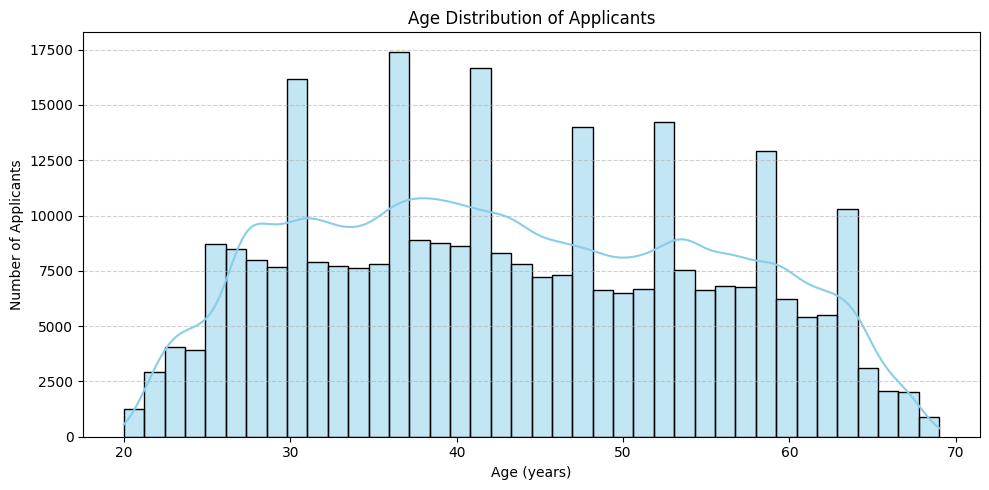

In [45]:
plt.figure(figsize=(10, 5))
sns.histplot(df['AGE'], bins=40, kde=True, color='skyblue')
plt.title('Age Distribution of Applicants')
plt.xlabel('Age (years)')
plt.ylabel('Number of Applicants')
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()

In [51]:
import pandas as pd
df['AGE_YEARS'] = (-df['DAYS_BIRTH'] / 365).round(1)


bins = [20, 30, 40, 50, 60, 70]
labels = ['20-30', '30-40', '40-50', '50-60', '60-70']
df['AGE_GROUP'] = pd.cut(df['AGE_YEARS'], bins=bins, labels=labels, right=False)


default_rate_by_age = df.groupby('AGE_GROUP')['TARGET'].mean().reset_index()
default_rate_by_age = default_rate_by_age.rename(columns={'TARGET': 'Default_Rate'})
print(default_rate_by_age)

  AGE_GROUP  Default_Rate
0     20-30      0.114722
1     30-40      0.095842
2     40-50      0.076630
3     50-60      0.061471
4     60-70      0.049203


C:\Users\DELL\AppData\Local\Temp\ipykernel_8896\3244116278.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['AGE_YEARS'] = (-df['DAYS_BIRTH'] / 365).round(1)
C:\Users\DELL\AppData\Local\Temp\ipykernel_8896\3244116278.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['AGE_GROUP'] = pd.cut(df['AGE_YEARS'], bins=bins, labels=labels, right=False)
C:\Users\DELL\AppData\Local\Temp\ipykernel_8896\3244116278.py:10: FutureWarning: The default of observed=False is deprecated and will be changed to True in 

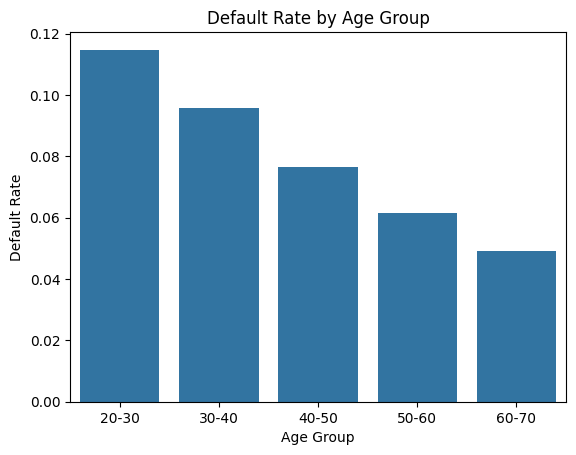

In [52]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.barplot(data=default_rate_by_age, x='AGE_GROUP', y='Default_Rate')
plt.title('Default Rate by Age Group')
plt.xlabel('Age Group')
plt.ylabel('Default Rate')
plt.show()

In [53]:
###  10

family_default = df.groupby('NAME_FAMILY_STATUS')['TARGET'].agg(['mean', 'count']).reset_index()
family_default.columns = ['Family_Status', 'Default_Rate', 'Total_Applicants']


C:\Users\DELL\AppData\Local\Temp\ipykernel_8896\3144628393.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=family_default, x='Family_Status', y='Default_Rate', palette='coolwarm')


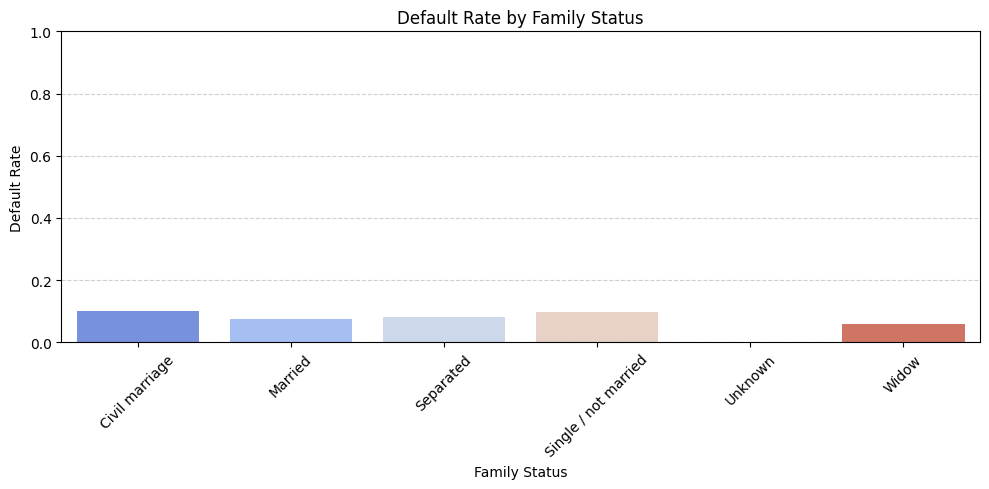

In [54]:
plt.figure(figsize=(10, 5))
sns.barplot(data=family_default, x='Family_Status', y='Default_Rate', palette='coolwarm')
plt.title('Default Rate by Family Status')
plt.xlabel('Family Status')
plt.ylabel('Default Rate')
plt.xticks(rotation=45)
plt.ylim(0, 1)
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()

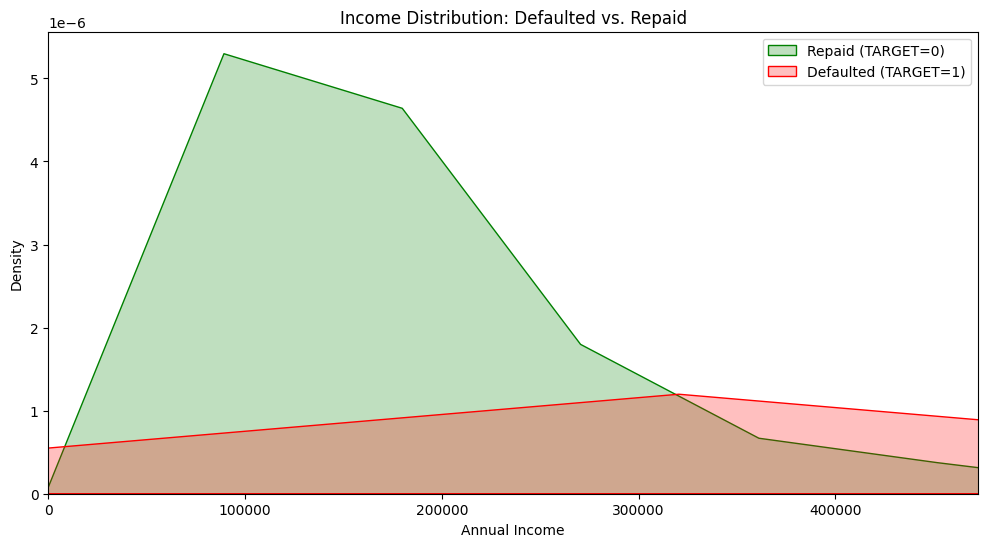

In [56]:
##11

import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))

sns.kdeplot(
    data=df[df['TARGET'] == 0],
    x='AMT_INCOME_TOTAL',
    fill=True,
    label='Repaid (TARGET=0)',
    color='green',
    common_norm=False
)

sns.kdeplot(
    data=df[df['TARGET'] == 1],
    x='AMT_INCOME_TOTAL',
    fill=True,
    label='Defaulted (TARGET=1)',
    color='red',
    common_norm=False
)

plt.title('Income Distribution: Defaulted vs. Repaid')
plt.xlabel('Annual Income')
plt.ylabel('Density')
plt.legend()
plt.xlim(0, df['AMT_INCOME_TOTAL'].quantile(0.99))  # Limit to exclude extreme outliers
plt.show()

In [57]:
education_counts = df['NAME_EDUCATION_TYPE'].value_counts()
education_percent = df['NAME_EDUCATION_TYPE'].value_counts(normalize=True) * 100

education_summary = pd.DataFrame({
    'Count': education_counts,
    'Percentage': education_percent.round(2)
})

In [60]:
education_breakdown = df['NAME_EDUCATION_TYPE'].value_counts().reset_index()
education_breakdown.columns = ['NAME_EDUCATION_TYPE', 'Count_Applicants']
print(education_breakdown)

             NAME_EDUCATION_TYPE  Count_Applicants
0  Secondary / secondary special            218389
1               Higher education             74862
2              Incomplete higher             10276
3                Lower secondary              3816
4                Academic degree               164


Text(0, 0.5, 'Education Level')

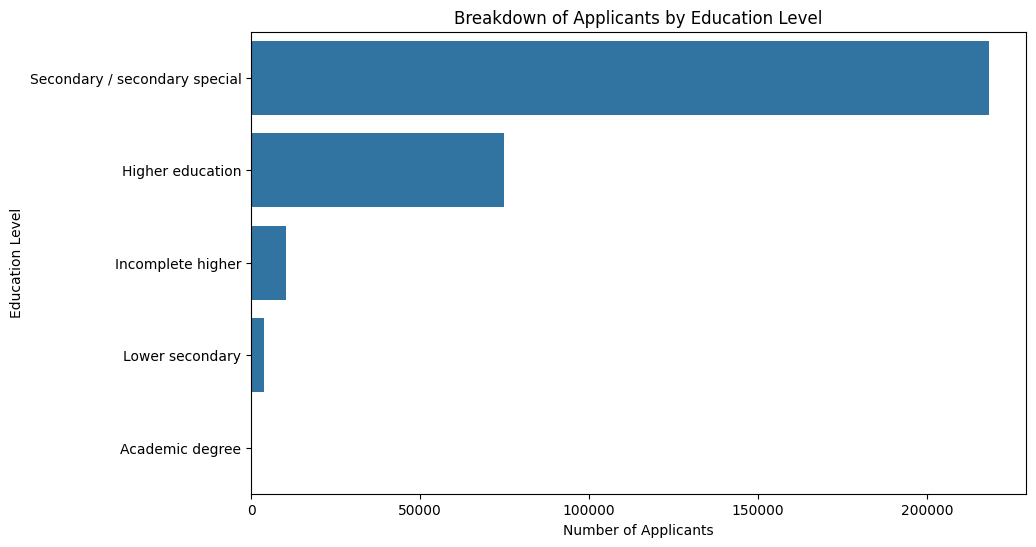

In [61]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
sns.barplot(
    data=education_breakdown,
    y='NAME_EDUCATION_TYPE',
    x='Count_Applicants',
    order=education_breakdown['NAME_EDUCATION_TYPE']
)

plt.title('Breakdown of Applicants by Education Level')
plt.xlabel('Number of Applicants')
plt.ylabel('Education Level')

In [62]:
## 13

default_rate_edu = (
    df.groupby('NAME_EDUCATION_TYPE')['TARGET']
    .agg(['mean', 'count'])
    .reset_index()
    .rename(columns={'mean': 'Default_Rate', 'count': 'Count_Applications'})
)

print(default_rate_edu)

             NAME_EDUCATION_TYPE  Default_Rate  Count_Applications
0                Academic degree      0.018293                 164
1               Higher education      0.053552               74862
2              Incomplete higher      0.084858               10276
3                Lower secondary      0.109277                3816
4  Secondary / secondary special      0.089400              218389


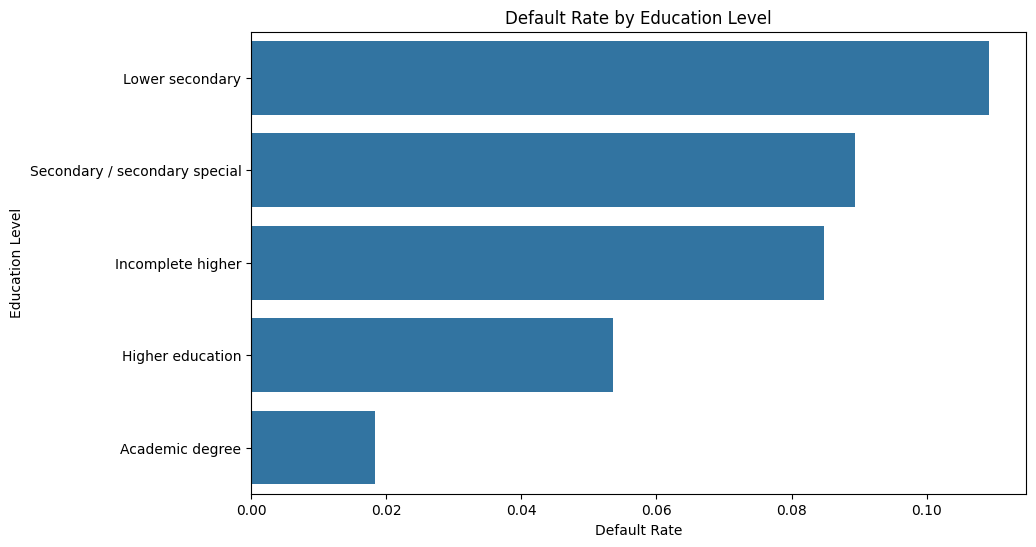

In [63]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
sns.barplot(
    data=default_rate_edu,
    x='Default_Rate',
    y='NAME_EDUCATION_TYPE',
    order=default_rate_edu.sort_values('Default_Rate', ascending=False)['NAME_EDUCATION_TYPE']
)

plt.title('Default Rate by Education Level')
plt.xlabel('Default Rate')
plt.ylabel('Education Level')
plt.show()

In [ ]:
#### 14


df['Has_Children'] = df['CNT_CHILDREN'].apply(lambda x: 'Has Children' if x > 0 else 'No Children')


default_rate_children = (
    df.groupby('Has_Children')['TARGET']
    .agg(['mean', 'count'])
    .reset_index()
    .rename(columns={'mean': 'Default_Rate', 'count': 'Count_Applications'})
)

print(default_rate_children)

   Has_Children  Default_Rate  Count_Applications
0  Has Children      0.089171               92138
1   No Children      0.077119              215369


C:\Users\DELL\AppData\Local\Temp\ipykernel_8896\4137088087.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Has_Children'] = df['CNT_CHILDREN'].apply(lambda x: 'Has Children' if x > 0 else 'No Children')


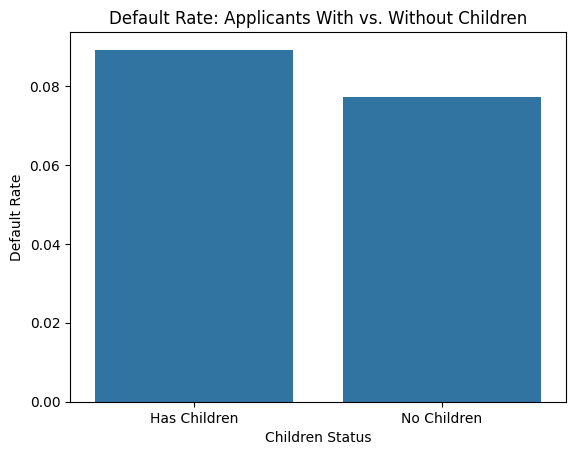

In [65]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.barplot(
    data=default_rate_children,
    x='Has_Children',
    y='Default_Rate'
)

plt.title('Default Rate: Applicants With vs. Without Children')
plt.xlabel('Children Status')
plt.ylabel('Default Rate')
plt.show()

In [66]:
#### 15

default_rate_car = (
    df.groupby('FLAG_OWN_CAR')['TARGET']
    .agg(['mean', 'count'])
    .reset_index()
    .rename(columns={'mean': 'Default_Rate', 'count': 'Count_Applications'})
)

print(default_rate_car)

  FLAG_OWN_CAR  Default_Rate  Count_Applications
0            N      0.085003              202922
1            Y      0.072439              104585


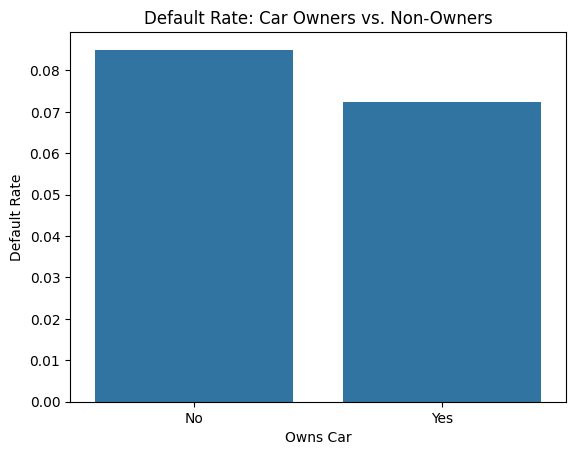

In [67]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.barplot(
    data=default_rate_car,
    x='FLAG_OWN_CAR',
    y='Default_Rate'
)

plt.title('Default Rate: Car Owners vs. Non-Owners')
plt.xlabel('Owns Car')
plt.ylabel('Default Rate')
plt.xticks([0, 1], ['No', 'Yes'])  # Optional: map 'N'/'Y' to labels if you want
plt.show()

In [68]:
### 16

default_rate_car = (
    df.groupby('FLAG_OWN_CAR')['TARGET']
    .agg(['mean', 'count'])
    .reset_index()
    .rename(columns={'mean': 'Default_Rate', 'count': 'Count_Applicants'})
)

print(default_rate_car)

  FLAG_OWN_CAR  Default_Rate  Count_Applicants
0            N      0.085003            202922
1            Y      0.072439            104585


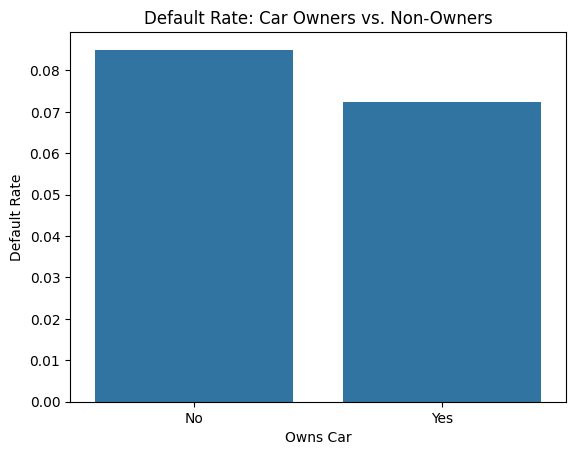

In [69]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.barplot(
    data=default_rate_car,
    x='FLAG_OWN_CAR',
    y='Default_Rate'
)

plt.title('Default Rate: Car Owners vs. Non-Owners')
plt.xlabel('Owns Car')
plt.ylabel('Default Rate')
plt.xticks([0, 1], ['No', 'Yes'])  # Optional: prettier labels
plt.show()

In [ ]:
 
housing_stats = (
    df.groupby('NAME_HOUSING_TYPE')['TARGET']
    .agg(['count', 'mean'])
    .reset_index()
    .rename(columns={'count': 'Count_Applicants', 'mean': 'Default_Rate'})
)

print(housing_stats)

     NAME_HOUSING_TYPE  Count_Applicants  Default_Rate
0      Co-op apartment              1122      0.079323
1    House / apartment            272865      0.077958
2  Municipal apartment             11182      0.085405
3     Office apartment              2617      0.065724
4     Rented apartment              4881      0.123131
5         With parents             14840      0.116981


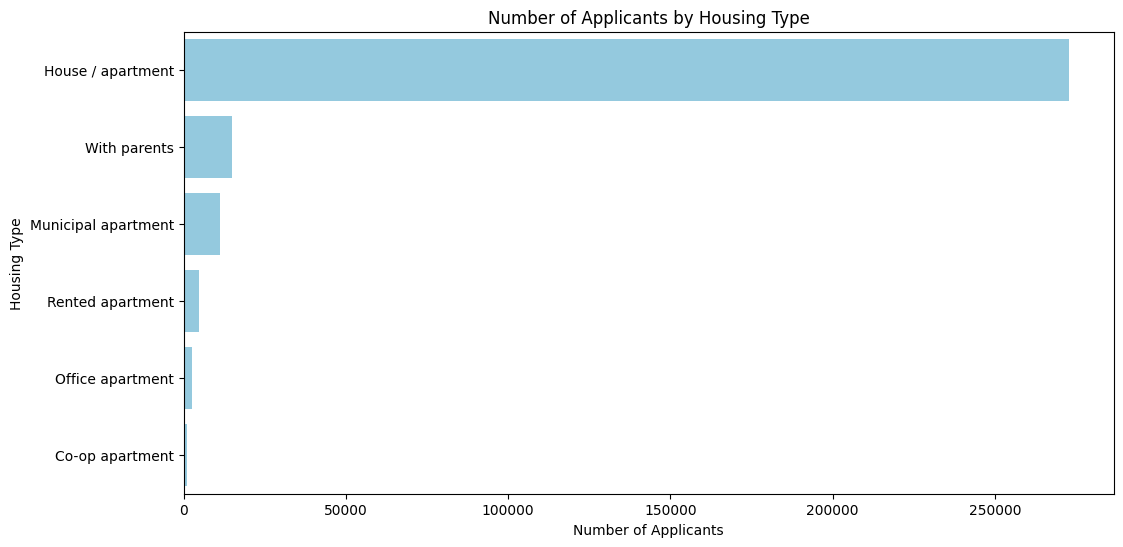

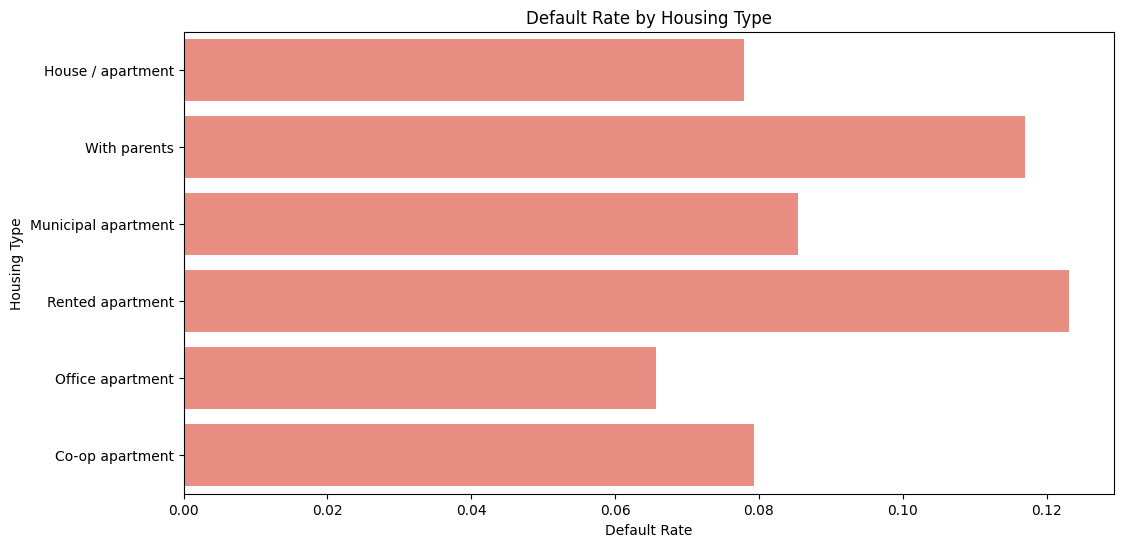

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt


housing_stats = housing_stats.sort_values('Count_Applicants', ascending=False)

plt.figure(figsize=(12, 6))
sns.barplot(
    data=housing_stats,
    y='NAME_HOUSING_TYPE',
    x='Count_Applicants',
    color='skyblue'
)
plt.title('Number of Applicants by Housing Type')
plt.xlabel('Number of Applicants')
plt.ylabel('Housing Type')
plt.show()


plt.figure(figsize=(12, 6))
sns.barplot(
    data=housing_stats,
    y='NAME_HOUSING_TYPE',
    x='Default_Rate',
    color='salmon'
)
plt.title('Default Rate by Housing Type')
plt.xlabel('Default Rate')
plt.ylabel('Housing Type')
plt.show()

In [ ]:
## 18 

print(df['AMT_CREDIT'].describe())


count    3.075070e+05
mean     5.990286e+05
std      4.024926e+05
min      4.500000e+04
25%      2.700000e+05
50%      5.135310e+05
75%      8.086500e+05
max      4.050000e+06
Name: AMT_CREDIT, dtype: float64


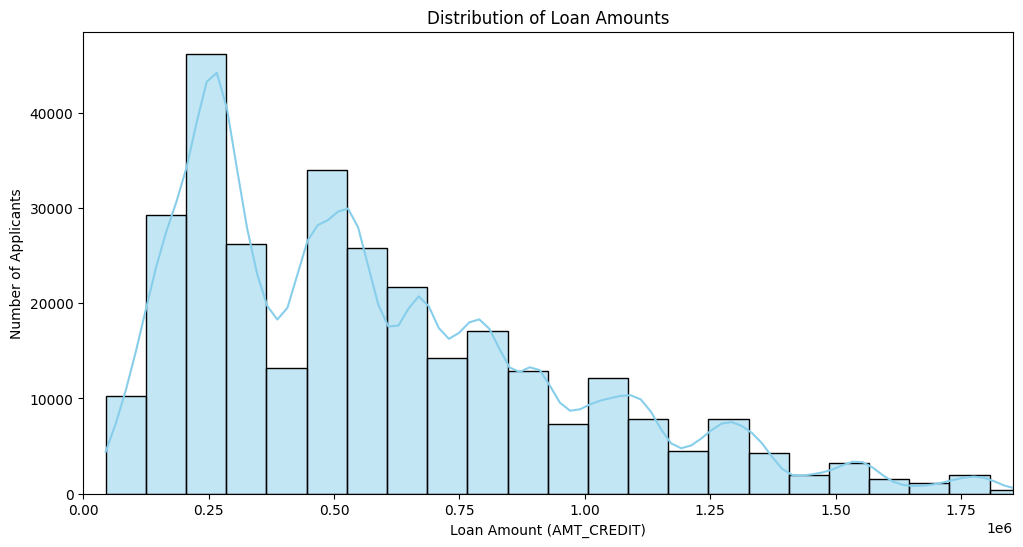

In [77]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))

sns.histplot(
    df['AMT_CREDIT'],
    bins=50,
    kde=True,
    color='skyblue'
)

plt.title('Distribution of Loan Amounts')
plt.xlabel('Loan Amount (AMT_CREDIT)')
plt.ylabel('Number of Applicants')
plt.xlim(0, df['AMT_CREDIT'].quantile(0.99))  # Optional: exclude extreme outliers for clarity
plt.show()

In [ ]:
### 19

df_filtered = df[['AMT_CREDIT', 'AMT_GOODS_PRICE']].dropna()

correlation = df_filtered['AMT_CREDIT'].corr(df_filtered['AMT_GOODS_PRICE'])
print(f"Correlation: {correlation:.4f}")


df_filtered['CREDIT_DIFF'] = df_filtered['AMT_CREDIT'] - df_filtered['AMT_GOODS_PRICE']
df_filtered['CREDIT_RATIO'] = df_filtered['AMT_CREDIT'] / df_filtered['AMT_GOODS_PRICE']

overfunded = df_filtered[df_filtered['CREDIT_RATIO'] > 1.1]
print(f"Loans over 10% higher than goods price: {len(overfunded)} cases")


Correlation: 0.9870
Loans over 10% higher than goods price: 171599 cases


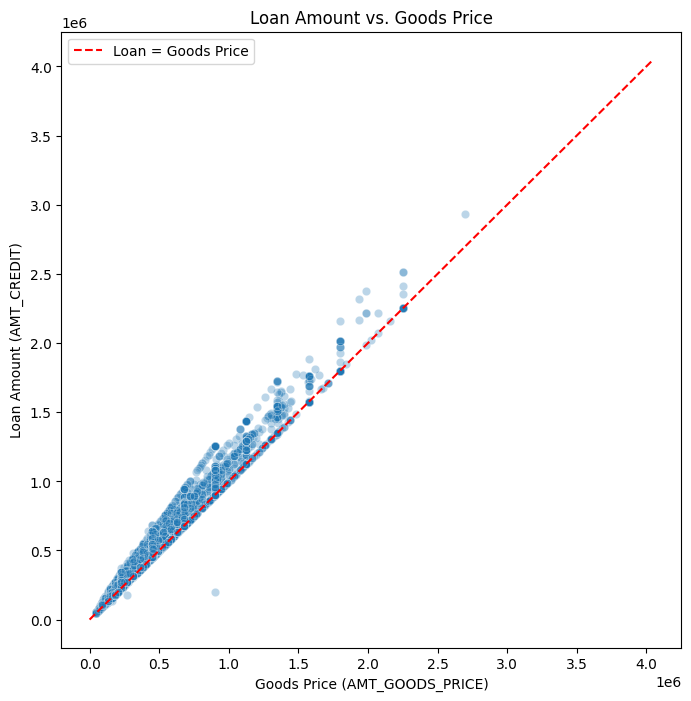

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 8))
sns.scatterplot(
    data=df.sample(5000),  
    x='AMT_GOODS_PRICE',
    y='AMT_CREDIT',
    alpha=0.3

max_val = max(df['AMT_GOODS_PRICE'].max(), df['AMT_CREDIT'].max())
plt.plot([0, max_val], [0, max_val], color='red', linestyle='--', label='Loan = Goods Price')

plt.title('Loan Amount vs. Goods Price')
plt.xlabel('Goods Price (AMT_GOODS_PRICE)')
plt.ylabel('Loan Amount (AMT_CREDIT)')
plt.legend()
plt.show()

In [ ]:
#### 20
income_type_counts = df['NAME_INCOME_TYPE'].value_counts()

print(income_type_counts)

NAME_INCOME_TYPE
Working                 158771
Commercial associate     71616
Pensioner                55362
State servant            21703
Unemployed                  22
Student                     18
Businessman                 10
Maternity leave              5
Name: count, dtype: int64


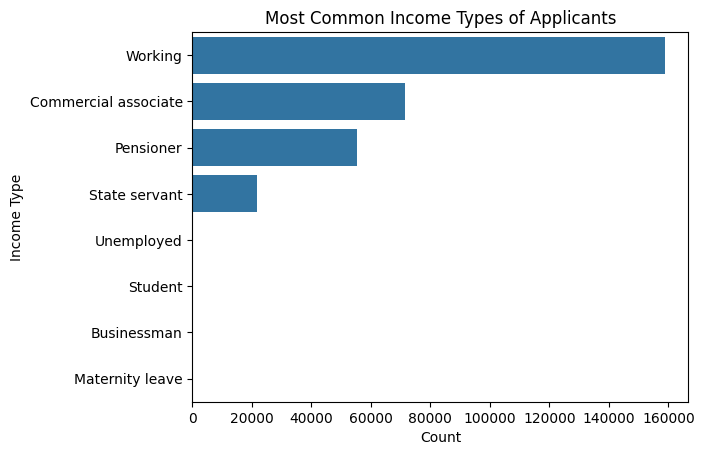

In [84]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.countplot(data=df, y='NAME_INCOME_TYPE', order=df['NAME_INCOME_TYPE'].value_counts().index)
plt.title('Most Common Income Types of Applicants')
plt.xlabel('Count')
plt.ylabel('Income Type')
plt.show()

In [ ]:

default_rates = df.groupby('NAME_INCOME_TYPE')['TARGET'].mean().sort_values(ascending=False)


print(default_rates)

NAME_INCOME_TYPE
Maternity leave         0.400000
Unemployed              0.363636
Working                 0.095887
Commercial associate    0.074844
State servant           0.057550
Pensioner               0.053864
Businessman             0.000000
Student                 0.000000
Name: TARGET, dtype: float64


C:\Users\DELL\AppData\Local\Temp\ipykernel_8896\2829595508.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=default_rates_df, x='TARGET', y='NAME_INCOME_TYPE', palette='coolwarm')


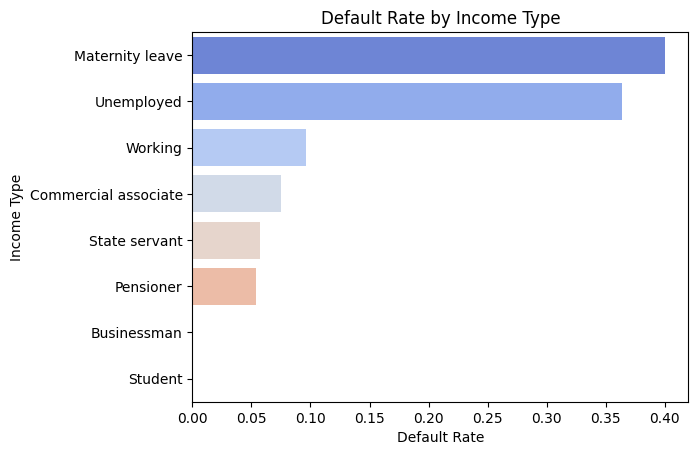

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt


default_rates_df = default_rates.reset_index()

sns.barplot(data=default_rates_df, x='TARGET', y='NAME_INCOME_TYPE', palette='coolwarm')
plt.xlabel('Default Rate')
plt.ylabel('Income Type')
plt.title('Default Rate by Income Type')
plt.show()

In [ ]:
## 22 

df['CREDIT_INCOME_RATIO'] = df['AMT_CREDIT'] / df['AMT_INCOME_TOTAL']

df_filtered = df[df['CREDIT_INCOME_RATIO'] < 10]

C:\Users\DELL\AppData\Local\Temp\ipykernel_8896\162572334.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['CREDIT_INCOME_RATIO'] = df['AMT_CREDIT'] / df['AMT_INCOME_TOTAL']


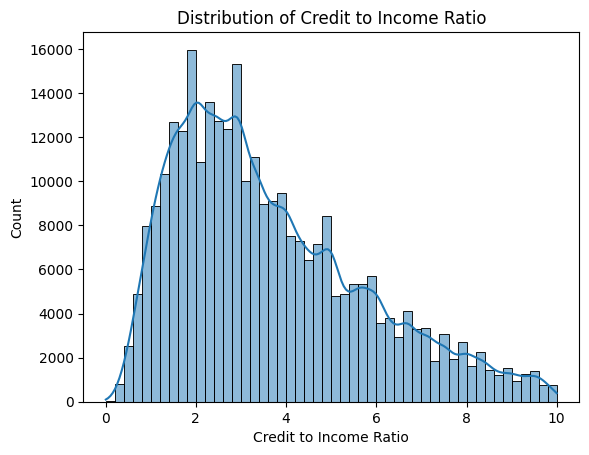

In [88]:
import seaborn as sns
import matplotlib.pyplot as plt

# Plot distribution
sns.histplot(df_filtered['CREDIT_INCOME_RATIO'], bins=50, kde=True)
plt.xlabel('Credit to Income Ratio')
plt.title('Distribution of Credit to Income Ratio')
plt.show()

C:\Users\DELL\AppData\Local\Temp\ipykernel_8896\2459078729.py:16: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  ratio_default = df_filtered.groupby('RATIO_BIN')['TARGET'].agg(


           Total  Defaults  Default Rate (%)
RATIO_BIN                                   
<0.5        1654       116          7.013301
0.5-1      12584       817          6.492371
1-2        56796      4384          7.718853
2-3        66239      5762          8.698803
3-5        86308      7555          8.753534
5-10       72897      5464          7.495507
10-20      10771       702          6.517501
20-50        257        24          9.338521
50+            1         1        100.000000


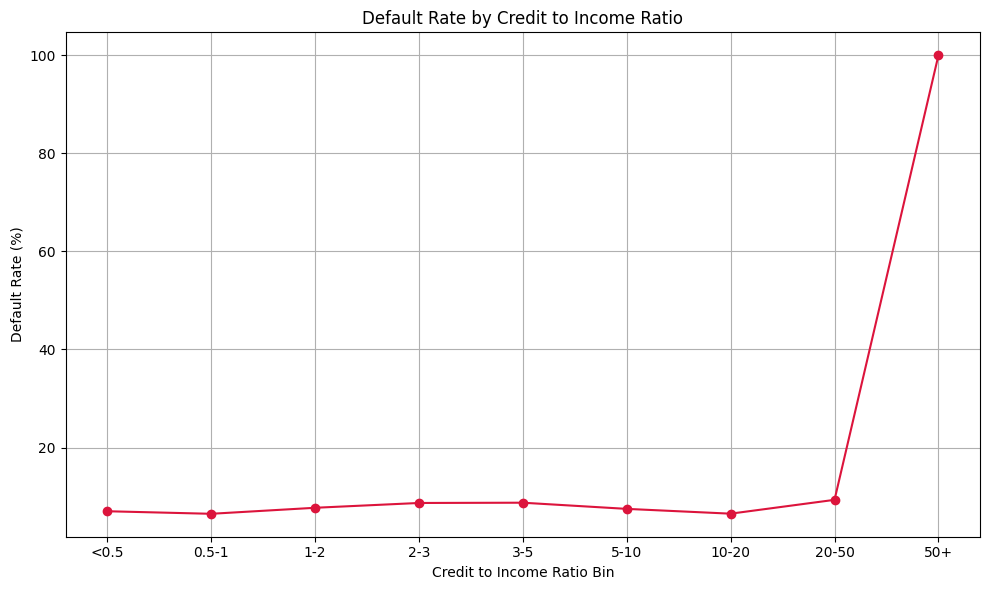

In [ ]:
### 23

import pandas as pd
import matplotlib.pyplot as plt

df_filtered = df[(df['AMT_INCOME_TOTAL'] > 0) & df['AMT_CREDIT'].notna()]

df_filtered['CREDIT_INCOME_RATIO'] = df_filtered['AMT_CREDIT'] / df_filtered['AMT_INCOME_TOTAL']

bins = [0, 0.5, 1, 2, 3, 5, 10, 20, 50, 100]
labels = ['<0.5', '0.5-1', '1-2', '2-3', '3-5', '5-10', '10-20', '20-50', '50+']
df_filtered['RATIO_BIN'] = pd.cut(df_filtered['CREDIT_INCOME_RATIO'], bins=bins, labels=labels, right=False)

ratio_default = df_filtered.groupby('RATIO_BIN')['TARGET'].agg(
    Total='count',
    Defaults='sum'
)
ratio_default['Default Rate (%)'] = (ratio_default['Defaults'] / ratio_default['Total']) * 100

plt.figure(figsize=(10, 6))
plt.plot(ratio_default.index.astype(str), ratio_default['Default Rate (%)'], marker='o', linestyle='-', color='crimson')
plt.title('Default Rate by Credit to Income Ratio')
plt.xlabel('Credit to Income Ratio Bin')
plt.ylabel('Default Rate (%)')
plt.grid(True)
plt.tight_layout()
plt.show()


count    252133.000000
mean          6.531897
std           6.406377
min           0.000000
25%           2.101370
50%           4.515068
75%           8.698630
max          49.073973
Name: YEARS_EMPLOYED, dtype: float64


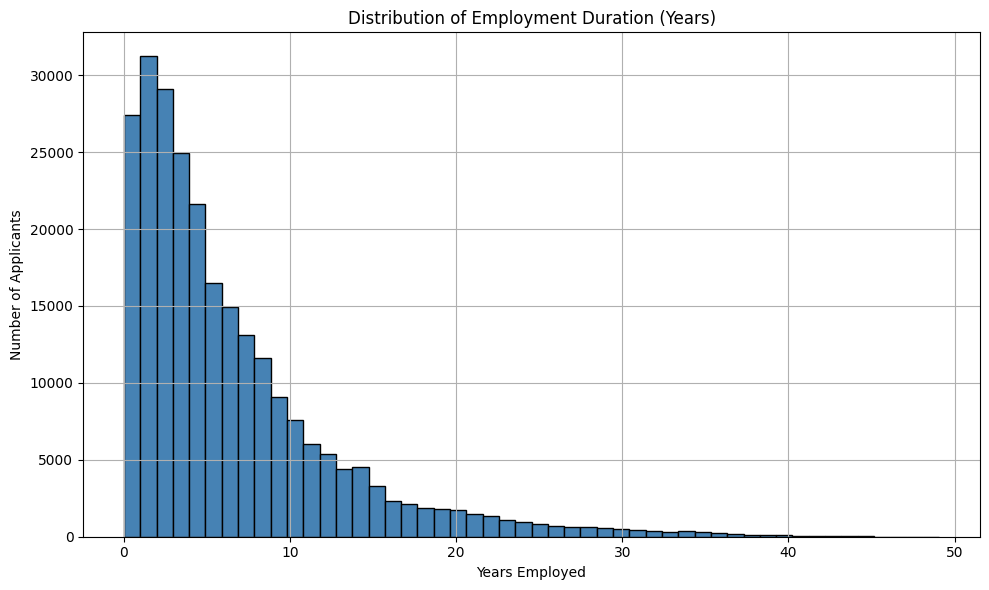

In [ ]:
## 24
import pandas as pd
import matplotlib.pyplot as plt

df_clean = df[df['DAYS_EMPLOYED'] != 365243].copy()

df_clean['YEARS_EMPLOYED'] = abs(df_clean['DAYS_EMPLOYED']) / 365


print(df_clean['YEARS_EMPLOYED'].describe())


plt.figure(figsize=(10, 6))
plt.hist(df_clean['YEARS_EMPLOYED'], bins=50, color='steelblue', edgecolor='black')
plt.title('Distribution of Employment Duration (Years)')
plt.xlabel('Years Employed')
plt.ylabel('Number of Applicants')
plt.grid(True)
plt.tight_layout()
plt.show()


C:\Users\DELL\AppData\Local\Temp\ipykernel_8896\3194499915.py:14: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  default_rates = df_clean.groupby('EMPLOYMENT_BIN')['TARGET'].mean() * 100


<module 'matplotlib.pyplot' from 'c:\\Users\\DELL\\Desktop\\HOME CREDIT EDA\\.venv\\Lib\\site-packages\\matplotlib\\pyplot.py'>

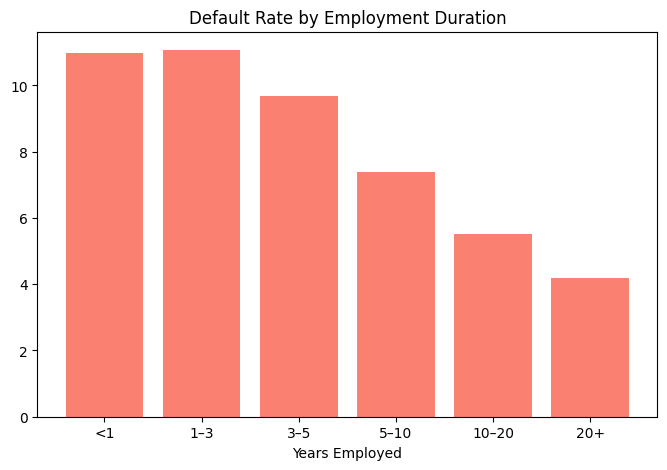

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

df_clean = df[df['DAYS_EMPLOYED'] != 365243].copy()
df_clean['YEARS_EMPLOYED'] = abs(df_clean['DAYS_EMPLOYED']) / 365
bins = [0, 1, 3, 5, 10, 20, 50]
labels = ['<1', '1–3', '3–5', '5–10', '10–20', '20+']
df_clean['EMPLOYMENT_BIN'] = pd.cut(df_clean['YEARS_EMPLOYED'], bins=bins, labels=labels, right=False)

default_rates = df_clean.groupby('EMPLOYMENT_BIN')['TARGET'].mean() * 100
plt.figure(figsize=(8, 5))
plt.bar(default_rates.index.astype(str), default_rates.values, color='salmon')
plt.title('Default Rate by Employment Duration')
plt.xlabel('Years Employed')
plt


In [ ]:
##### 26

import pandas as pd

org_counts = df['ORGANIZATION_TYPE'].value_counts(dropna=True)
org_percent = df['ORGANIZATION_TYPE'].value_counts(normalize=True, dropna=True) * 100


org_summary = pd.DataFrame({
    'Applicant Count': org_counts,
    'Percentage': org_percent.round(2)
})

print(org_summary.head(10))  


                        Applicant Count  Percentage
ORGANIZATION_TYPE                                  
Business Entity Type 3            67992       22.11
XNA                               55374       18.01
Self-employed                     38412       12.49
Other                             16683        5.43
Medicine                          11192        3.64
Business Entity Type 2            10553        3.43
Government                        10404        3.38
School                             8893        2.89
Trade: type 7                      7831        2.55
Kindergarten                       6879        2.24


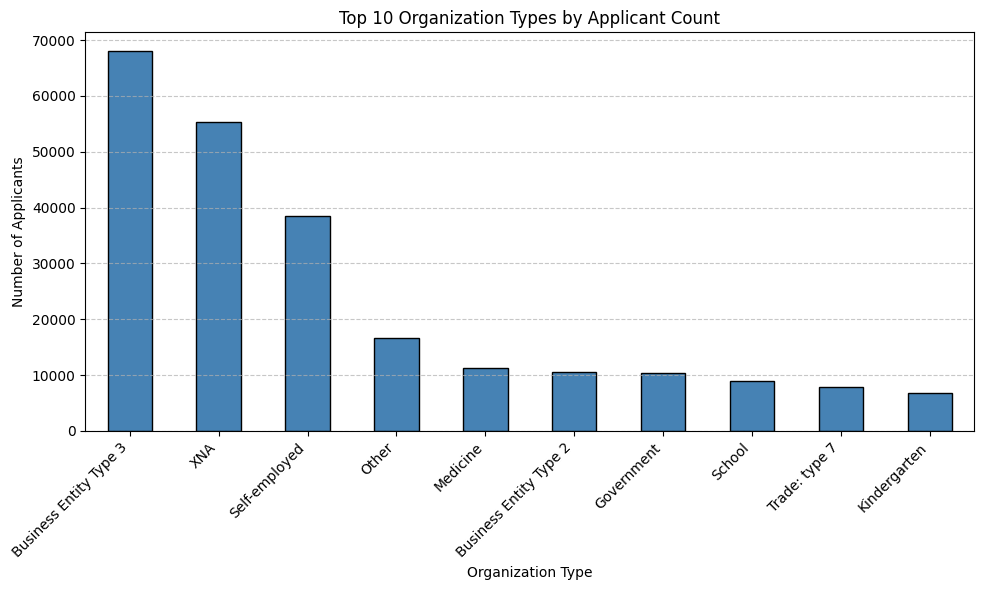

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt


org_counts = df['ORGANIZATION_TYPE'].value_counts().head(10)  


plt.figure(figsize=(10, 6))
org_counts.plot(kind='bar', color='steelblue', edgecolor='black')

plt.title('Top 10 Organization Types by Applicant Count')
plt.xlabel('Organization Type')
plt.ylabel('Number of Applicants')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.show()


🟢 Lowest Default Rates:
ORGANIZATION_TYPE
Trade: type 4          0.031250
Industry: type 12      0.037940
Transport: type 1      0.044776
Trade: type 6          0.045959
Security Ministries    0.048632
Name: TARGET, dtype: float64

🔴 Highest Default Rates:
ORGANIZATION_TYPE
Construction         0.116798
Restaurant           0.117062
Industry: type 8     0.125000
Industry: type 13    0.134328
Transport: type 3    0.157540
Name: TARGET, dtype: float64


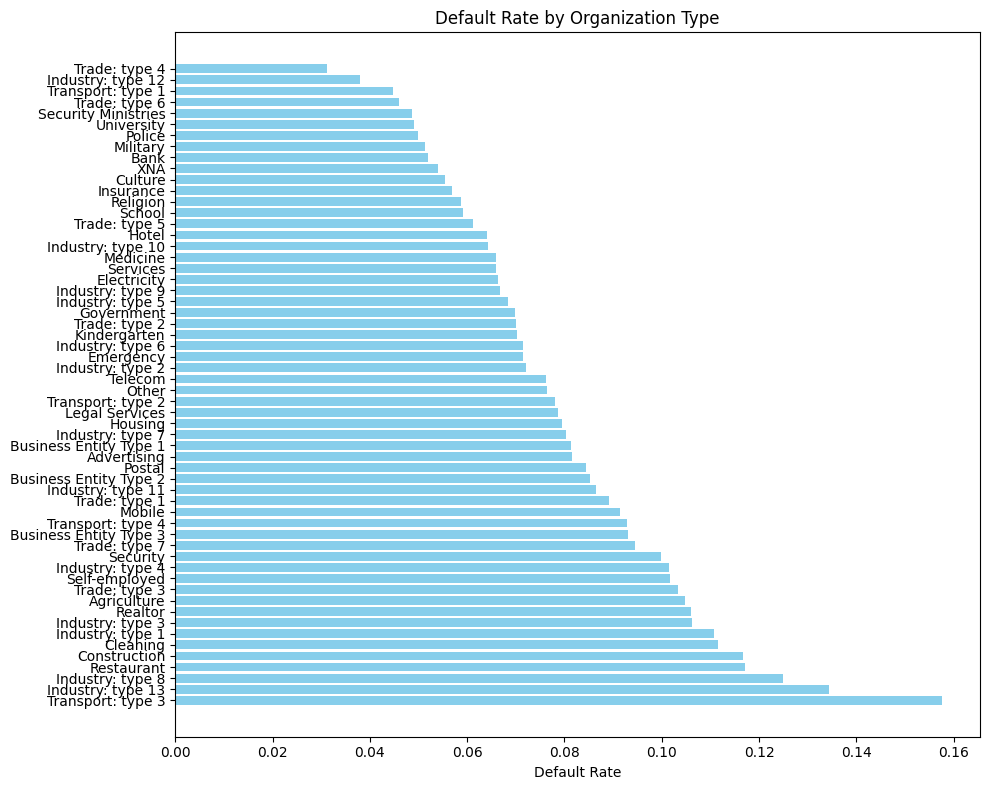

In [ ]:
## 27

import pandas as pd
import matplotlib.pyplot as plt

df = df[['ORGANIZATION_TYPE', 'TARGET']].dropna()


org_default_rate = df.groupby('ORGANIZATION_TYPE')['TARGET'].mean().sort_values()

print("🟢 Lowest Default Rates:")
print(org_default_rate.head(5))

print("\n🔴 Highest Default Rates:")
print(org_default_rate.tail(5))

plt.figure(figsize=(10, 8))
plt.barh(org_default_rate.index, org_default_rate.values, color='skyblue')
plt.xlabel('Default Rate')
plt.title('Default Rate by Organization Type')
plt.gca().invert_yaxis() 
plt.tight_layout()
plt.show()


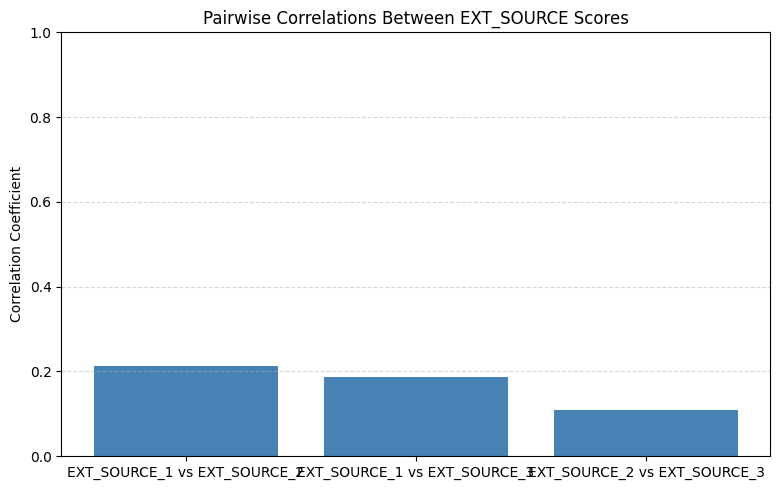

In [ ]:
### 28

import pandas as pd
import matplotlib.pyplot as plt

ext_sources = df[['EXT_SOURCE_1', 'EXT_SOURCE_2', 'EXT_SOURCE_3']]
corr_matrix = ext_sources.corr()


pairs = [('EXT_SOURCE_1', 'EXT_SOURCE_2'),
         ('EXT_SOURCE_1', 'EXT_SOURCE_3'),
         ('EXT_SOURCE_2', 'EXT_SOURCE_3')]

correlations = [corr_matrix.loc[i, j] for i, j in pairs]
labels = [f'{i} vs {j}' for i, j in pairs]

plt.figure(figsize=(8, 5))
plt.bar(labels, correlations, color='steelblue')
plt.ylim(0, 1)
plt.title('Pairwise Correlations Between EXT_SOURCE Scores')
plt.ylabel('Correlation Coefficient')
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()


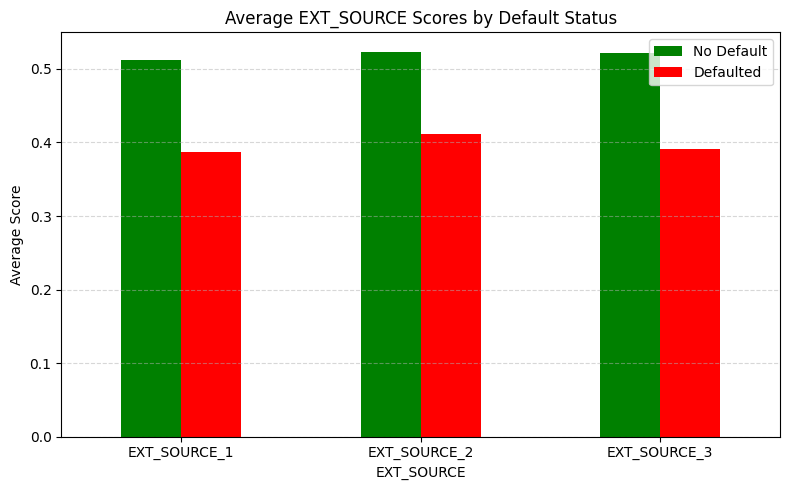

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

ext_sources = ['EXT_SOURCE_1', 'EXT_SOURCE_2', 'EXT_SOURCE_3']


avg_scores = df.groupby('TARGET')[ext_sources].mean().T  
avg_scores.columns = ['No Default', 'Defaulted']


avg_scores.plot(kind='bar', figsize=(8, 5), color=['green', 'red'])
plt.title('Average EXT_SOURCE Scores by Default Status')
plt.ylabel('Average Score')
plt.xlabel('EXT_SOURCE')
plt.xticks(rotation=0)
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()


C:\Users\DELL\AppData\Local\Temp\ipykernel_8896\258671970.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['AGE'] = abs(df['DAYS_BIRTH']) / 365
C:\Users\DELL\AppData\Local\Temp\ipykernel_8896\258671970.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['AGE_GROUP'] = pd.cut(df['AGE'], bins=[20, 30, 40, 50, 60, 70],
C:\Users\DELL\AppData\Local\Temp\ipykernel_8896\258671970.py:8: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pas

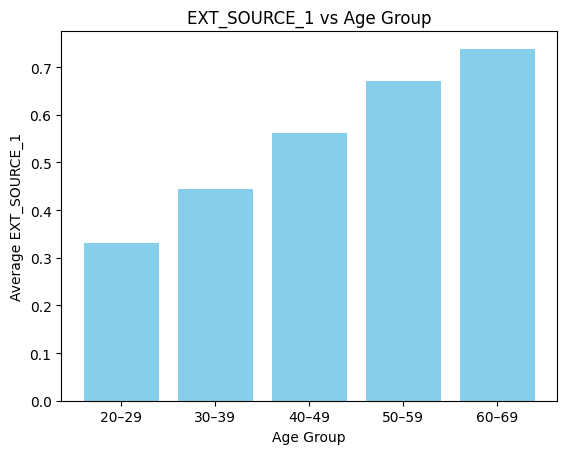

In [ ]:

df['AGE'] = abs(df['DAYS_BIRTH']) / 365


df['AGE_GROUP'] = pd.cut(df['AGE'], bins=[20, 30, 40, 50, 60, 70],
                         labels=['20–29', '30–39', '40–49', '50–59', '60–69'])

avg_scores = df.groupby('AGE_GROUP')['EXT_SOURCE_1'].mean()


plt.bar(avg_scores.index.astype(str), avg_scores.values, color='skyblue')
plt.title('EXT_SOURCE_1 vs Age Group')
plt.xlabel('Age Group')
plt.ylabel('Average EXT_SOURCE_1')
plt.show()


C:\Users\DELL\AppData\Local\Temp\ipykernel_8896\1418213149.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['NUM_DOCUMENTS'] = df[doc_cols].sum(axis=1)


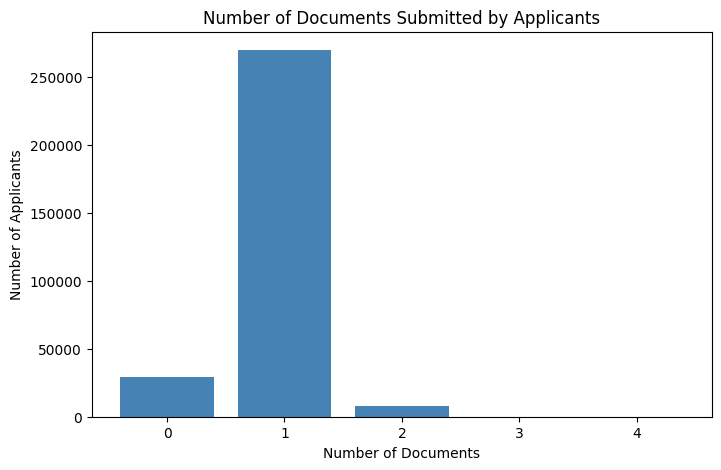

In [103]:
### 31
doc_cols = [col for col in df.columns if col.startswith('FLAG_DOCUMENT_')]

df['NUM_DOCUMENTS'] = df[doc_cols].sum(axis=1)

doc_distribution = df['NUM_DOCUMENTS'].value_counts().sort_index()

plt.figure(figsize=(8, 5))
plt.bar(doc_distribution.index, doc_distribution.values, color='steelblue')
plt.title('Number of Documents Submitted by Applicants')
plt.xlabel('Number of Documents')
plt.ylabel('Number of Applicants')
plt.show()


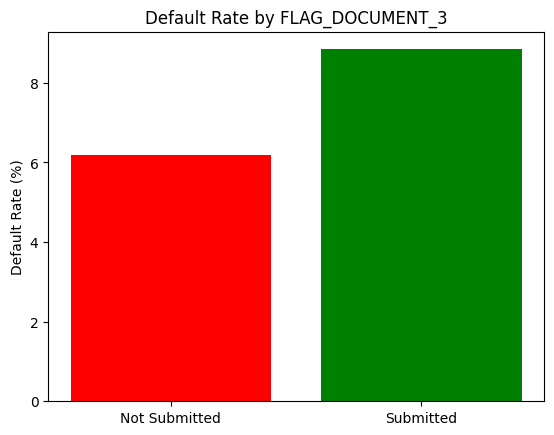

In [104]:
### 32

import matplotlib.pyplot as plt

rates = df.groupby('FLAG_DOCUMENT_3')['TARGET'].mean() * 100

plt.bar(['Not Submitted', 'Submitted'], rates, color=['red', 'green'])
plt.title('Default Rate by FLAG_DOCUMENT_3')
plt.ylabel('Default Rate (%)')
plt.show()


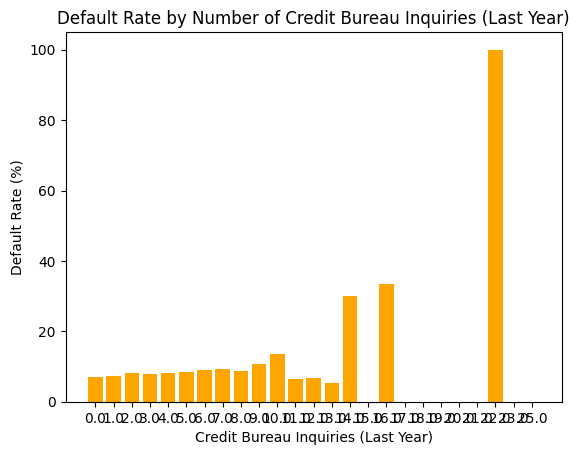

In [ ]:
### 33

import pandas as pd
import matplotlib.pyplot as plt

inquiry_default = df.groupby('AMT_REQ_CREDIT_BUREAU_YEAR')['TARGET'].mean() * 100  # Convert to percentage

plt.bar(inquiry_default.index.astype(str), inquiry_default.values, color='orange')
plt.title('Default Rate by Number of Credit Bureau Inquiries (Last Year)')
plt.xlabel('Credit Bureau Inquiries (Last Year)')
plt.ylabel('Default Rate (%)')
plt.show()


C:\Users\DELL\AppData\Local\Temp\ipykernel_8896\3023432471.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['CREDIT_INCOME_RATIO'] = df['AMT_CREDIT'] / df['AMT_INCOME_TOTAL']


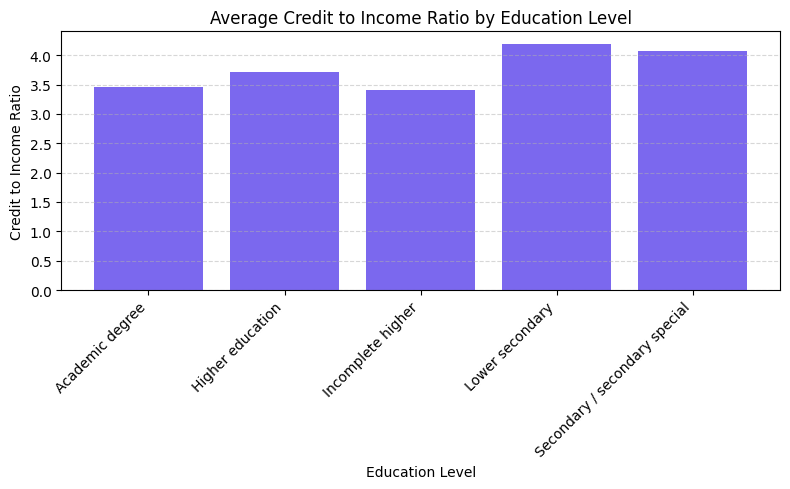

In [ ]:
###   34

import pandas as pd
import matplotlib.pyplot as plt


df['CREDIT_INCOME_RATIO'] = df['AMT_CREDIT'] / df['AMT_INCOME_TOTAL']


avg_ratio_by_edu = df.groupby('NAME_EDUCATION_TYPE')['CREDIT_INCOME_RATIO'].mean()


plt.figure(figsize=(8, 5))
plt.bar(avg_ratio_by_edu.index, avg_ratio_by_edu.values, color='mediumslateblue')
plt.title('Average Credit to Income Ratio by Education Level')
plt.xlabel('Education Level')
plt.ylabel('Credit to Income Ratio')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.show()


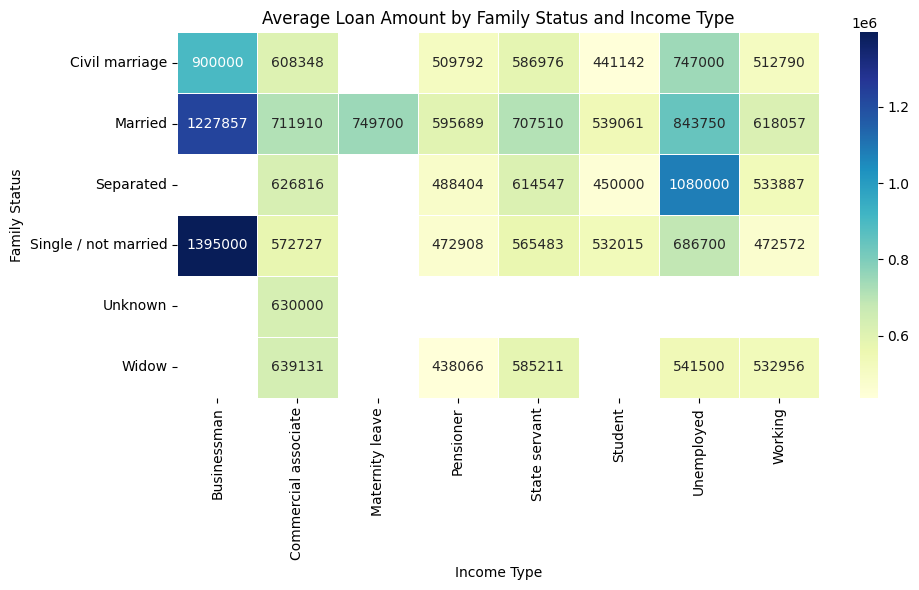

In [ ]:
#### 35


pivot_table = df.pivot_table(
    index='NAME_FAMILY_STATUS',
    columns='NAME_INCOME_TYPE',
    values='AMT_CREDIT',
    aggfunc='mean'
)


plt.figure(figsize=(10, 6))
sns.heatmap(pivot_table, annot=True, fmt=".0f", cmap="YlGnBu", linewidths=0.5)
plt.title('Average Loan Amount by Family Status and Income Type')
plt.xlabel('Income Type')
plt.ylabel('Family Status')
plt.tight_layout()
plt.show()


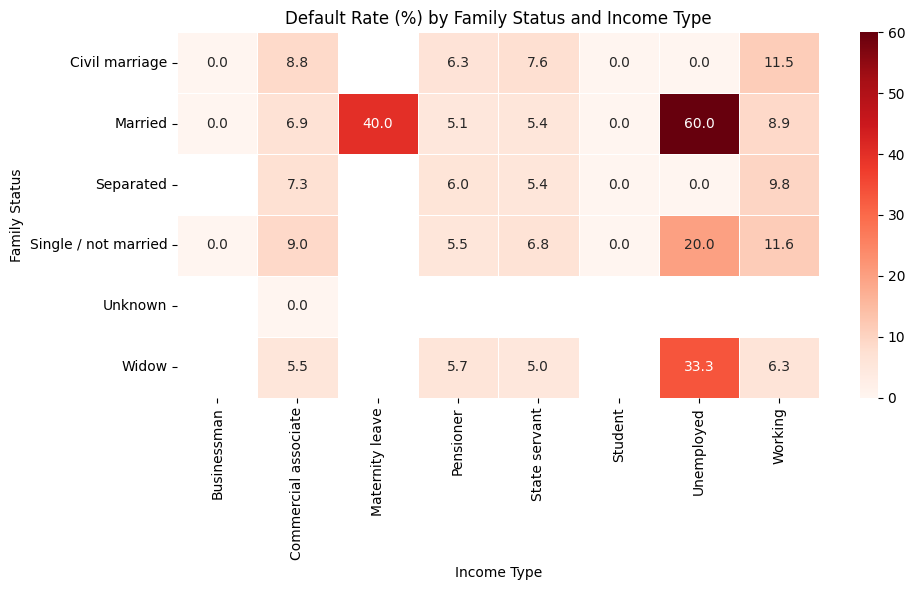

In [ ]:
### 36

pivot_table = df.pivot_table(
    index='NAME_FAMILY_STATUS',
    columns='NAME_INCOME_TYPE',
    values='TARGET',
    aggfunc='mean'
) * 100  
plt.figure(figsize=(10, 6))
sns.heatmap(pivot_table, annot=True, fmt=".1f", cmap="Reds", linewidths=0.5)
plt.title('Default Rate (%) by Family Status and Income Type')
plt.xlabel('Income Type')
plt.ylabel('Family Status')
plt.tight_layout()
plt.show()


C:\Users\DELL\AppData\Local\Temp\ipykernel_8896\1193964360.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['AGE'] = abs(df['DAYS_BIRTH']) / 365
C:\Users\DELL\AppData\Local\Temp\ipykernel_8896\1193964360.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['AGE_GROUP'] = pd.cut(df['AGE'], bins=[20, 30, 40, 50, 60, 70], labels=['20–29', '30–39', '40–49', '50–59', '60–69'])
C:\Users\DELL\AppData\Local\Temp\ipykernel_8896\1193964360.py:11: FutureWarning: The default of observed=False is deprecated and 

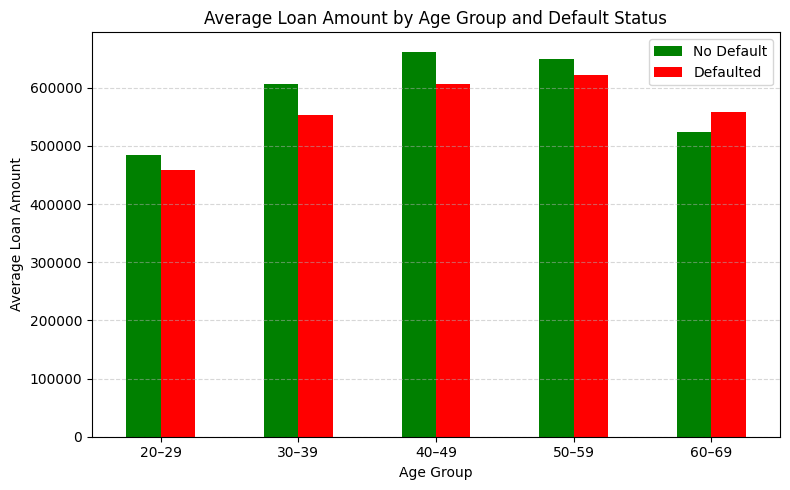

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt


df['AGE'] = abs(df['DAYS_BIRTH']) / 365


df['AGE_GROUP'] = pd.cut(df['AGE'], bins=[20, 30, 40, 50, 60, 70], labels=['20–29', '30–39', '40–49', '50–59', '60–69'])


grouped = df.groupby(['AGE_GROUP', 'TARGET'])['AMT_CREDIT'].mean().unstack()


grouped.plot(kind='bar', figsize=(8, 5), color=['green', 'red'])
plt.title('Average Loan Amount by Age Group and Default Status')
plt.xlabel('Age Group')
plt.ylabel('Average Loan Amount')
plt.legend(['No Default', 'Defaulted'])
plt.xticks(rotation=0)
plt.tight_layout()
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.show()


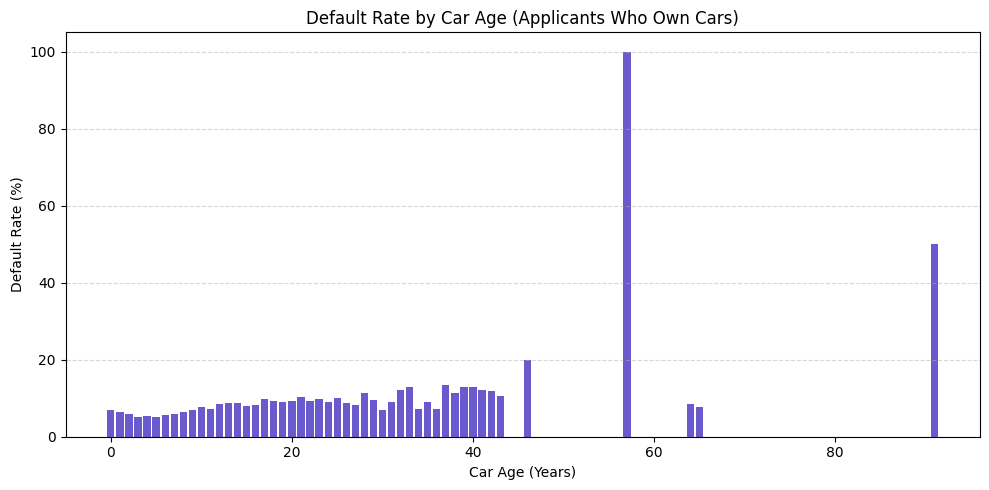

In [ ]:
### 38

import pandas as pd
import matplotlib.pyplot as plt


df_car_owners = df[df['OWN_CAR_AGE'].notnull()]


car_age_default = df_car_owners.groupby('OWN_CAR_AGE')['TARGET'].mean() * 100  
plt.figure(figsize=(10, 5))
plt.bar(car_age_default.index, car_age_default.values, color='slateblue')
plt.title('Default Rate by Car Age (Applicants Who Own Cars)')
plt.xlabel('Car Age (Years)')
plt.ylabel('Default Rate (%)')
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()


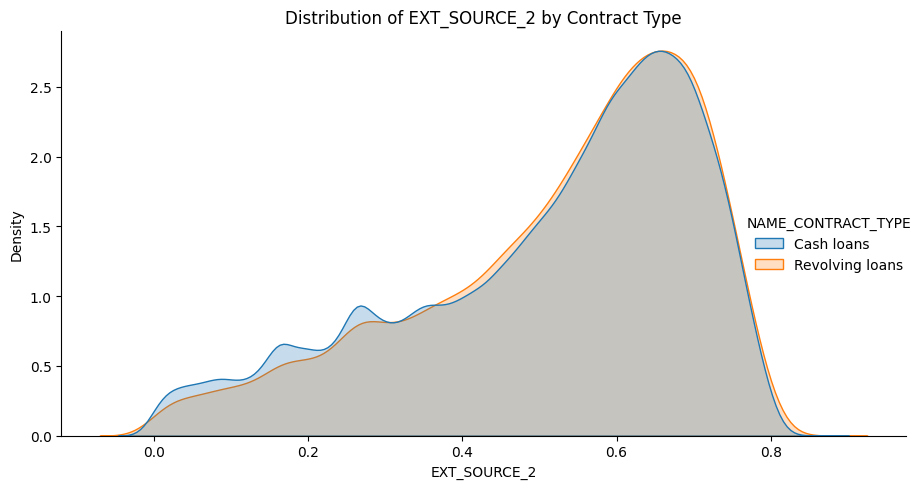

In [ ]:
### 39

import seaborn as sns
import matplotlib.pyplot as plt

df_clean = df[df['EXT_SOURCE_2'].notnull()
sns.displot(
    data=df_clean,
    x='EXT_SOURCE_2',
    hue='NAME_CONTRACT_TYPE',
    kind='kde',
    fill=True,
    common_norm=False,
    height=5,
    aspect=1.5
)

plt.title('Distribution of EXT_SOURCE_2 by Contract Type')
plt.xlabel('EXT_SOURCE_2')
plt.ylabel('Density')
plt.tight_layout()
plt.show()


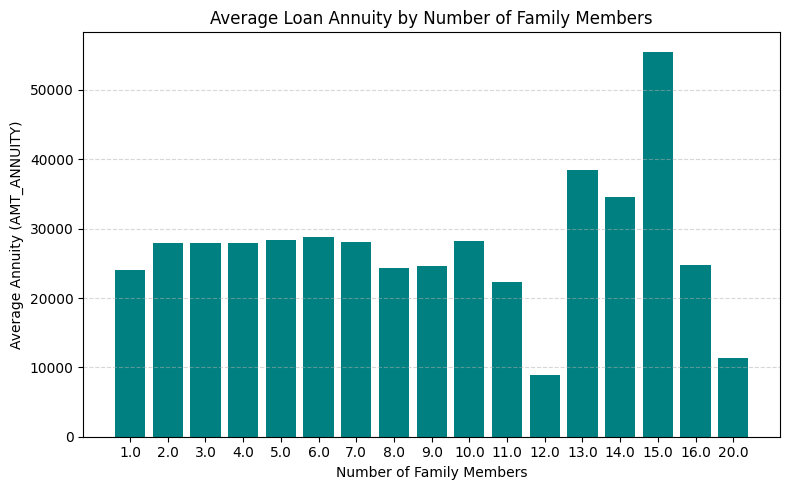

In [ ]:
### 40


avg_annuity_by_family = df.groupby('CNT_FAM_MEMBERS')['AMT_ANNUITY'].mean()

plt.figure(figsize=(8, 5))
plt.bar(avg_annuity_by_family.index.astype(str), avg_annuity_by_family.values, color='teal')
plt.title('Average Loan Annuity by Number of Family Members')
plt.xlabel('Number of Family Members')
plt.ylabel('Average Annuity (AMT_ANNUITY)')
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()


C:\Users\DELL\AppData\Local\Temp\ipykernel_8896\579148625.py:17: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  avg_loan = df_clean.groupby('EMPLOYMENT_GROUP')['AMT_CREDIT'].mean()


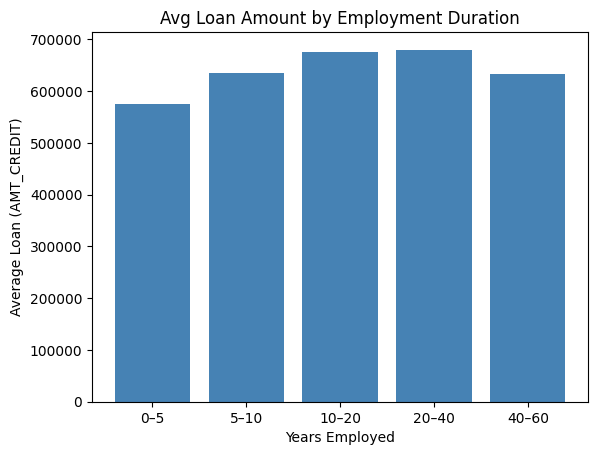

In [ ]:
#### 41


import matplotlib.pyplot as plt

df_clean = df[df['DAYS_EMPLOYED'] != 365243].copy()


df_clean['YEARS_EMPLOYED'] = abs(df_clean['DAYS_EMPLOYED']) / 365


df_clean['EMPLOYMENT_GROUP'] = pd.cut(df_clean['YEARS_EMPLOYED'], bins=[0, 5, 10, 20, 40, 60], 
                                       labels=['0–5', '5–10', '10–20', '20–40', '40–60'])


avg_loan = df_clean.groupby('EMPLOYMENT_GROUP')['AMT_CREDIT'].mean()


plt.bar(avg_loan.index.astype(str), avg_loan.values, color='steelblue')
plt.title('Avg Loan Amount by Employment Duration')
plt.xlabel('Years Employed')
plt.ylabel('Average Loan (AMT_CREDIT)')
plt.show()


C:\Users\DELL\AppData\Local\Temp\ipykernel_8896\2267711102.py:17: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  avg_score = df_clean.groupby('EMPLOYMENT_GROUP')['EXT_SOURCE_3'].mean()


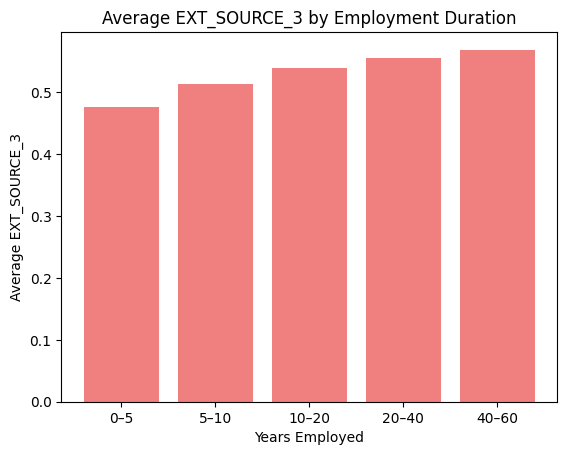

In [ ]:
### 42

import matplotlib.pyplot as plt


df_clean = df[(df['DAYS_EMPLOYED'] != 365243) & (df['EXT_SOURCE_3'].notnull())].copy()


df_clean['YEARS_EMPLOYED'] = abs(df_clean['DAYS_EMPLOYED']) / 365

df_clean['EMPLOYMENT_GROUP'] = pd.cut(df_clean['YEARS_EMPLOYED'], 
                                       bins=[0, 5, 10, 20, 40, 60], 
                                       labels=['0–5', '5–10', '10–20', '20–40', '40–60'])


avg_score = df_clean.groupby('EMPLOYMENT_GROUP')['EXT_SOURCE_3'].mean()

plt.bar(avg_score.index.astype(str), avg_score.values, color='lightcoral')
plt.title('Average EXT_SOURCE_3 by Employment Duration')
plt.xlabel('Years Employed')
plt.ylabel('Average EXT_SOURCE_3')
plt.show()


In [ ]:
### 43

import numpy as np


regions = ['North', 'South', 'East', 'West', 'Central']
df['REGION'] = np.random.choice(regions, size=len(df))


C:\Users\DELL\AppData\Local\Temp\ipykernel_8896\2002187597.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['REGION'] = np.random.choice(regions, size=len(df))


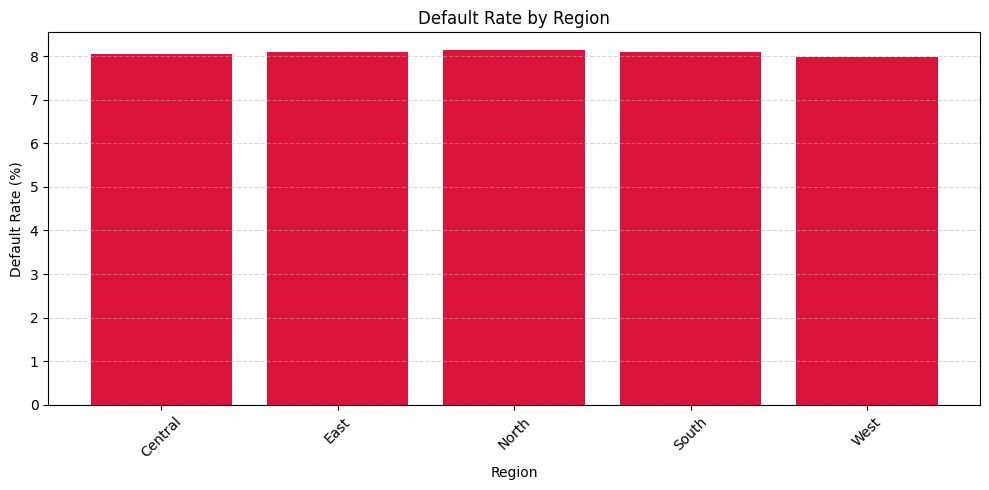

In [ ]:
import matplotlib.pyplot as plt
default_rate_by_region = df.groupby('REGION')['TARGET'].mean() * 100  


plt.figure(figsize=(10, 5))
plt.bar(default_rate_by_region.index, default_rate_by_region.values, color='crimson')
plt.title('Default Rate by Region')
plt.xlabel('Region')
plt.ylabel('Default Rate (%)')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()


C:\Users\DELL\AppData\Local\Temp\ipykernel_8896\1228358330.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['CITY'] = np.random.choice(['CityA', 'CityB', 'CityC', 'CityD'], size=len(df))


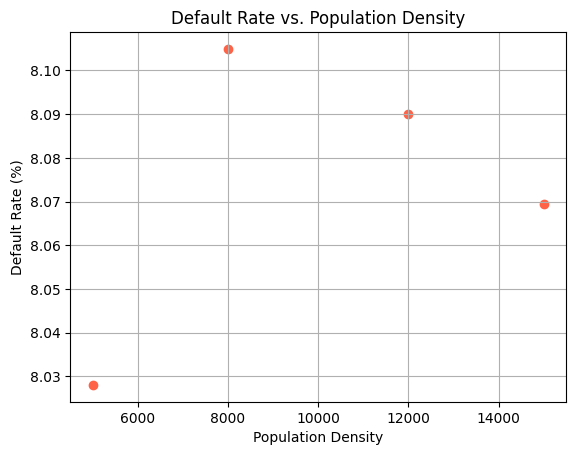

Correlation: 0.40150366962123846


In [ ]:
### 44


df['CITY'] = np.random.choice(['CityA', 'CityB', 'CityC', 'CityD'], size=len(df))

city_pop = pd.DataFrame({
    'CITY': ['CityA', 'CityB', 'CityC', 'CityD'],
    'POP_DENSITY': [5000, 15000, 8000, 12000]  
})

city_defaults = df.groupby('CITY')['TARGET'].mean().reset_index()


merged = pd.merge(city_defaults, city_pop, on='CITY')

plt.scatter(merged['POP_DENSITY'], merged['TARGET'] * 100, color='tomato')
plt.xlabel('Population Density')
plt.ylabel('Default Rate (%)')
plt.title('Default Rate vs. Population Density')
plt.grid(True)
plt.show()

print("Correlation:", merged['POP_DENSITY'].corr(merged['TARGET']))


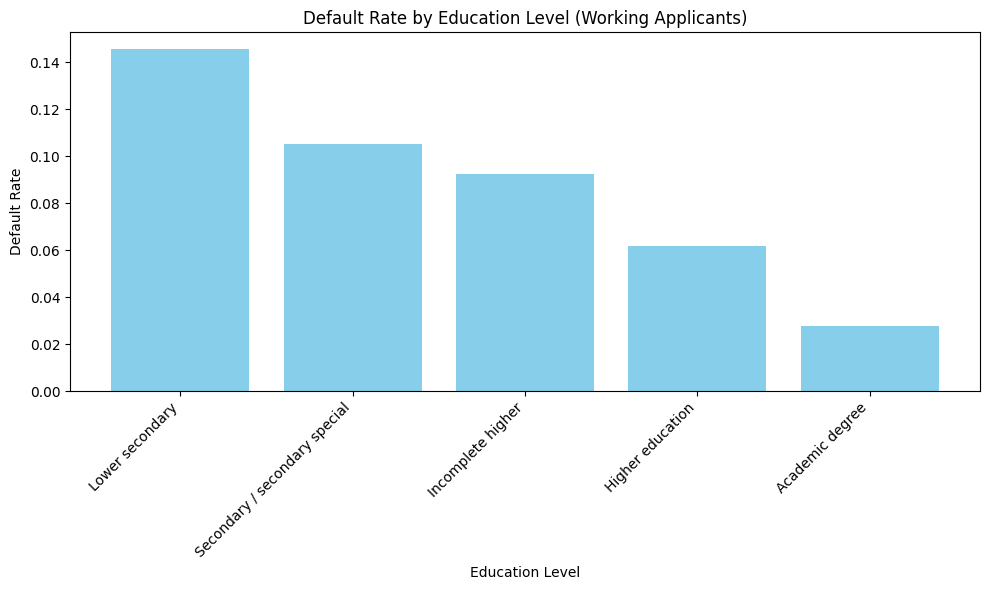

In [ ]:
### 45


working_df = df[df['NAME_INCOME_TYPE'] == 'Working']


default_rates = (
    working_df.groupby('NAME_EDUCATION_TYPE')['TARGET']
    .agg(['count', 'sum'])
    .rename(columns={'count': 'Total_Applicants', 'sum': 'Defaults'})
)
default_rates['Default_Rate'] = default_rates['Defaults'] / default_rates['Total_Applicants']

default_rates = default_rates.sort_values('Default_Rate', ascending=False)

plt.figure(figsize=(10, 6))
plt.bar(default_rates.index, default_rates['Default_Rate'], color='skyblue')
plt.title('Default Rate by Education Level (Working Applicants)')
plt.ylabel('Default Rate')
plt.xlabel('Education Level')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


C:\Users\DELL\AppData\Local\Temp\ipykernel_6048\4034500225.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Annuity_Income_Ratio'] = df['AMT_ANNUITY'] / df['AMT_INCOME_TOTAL']


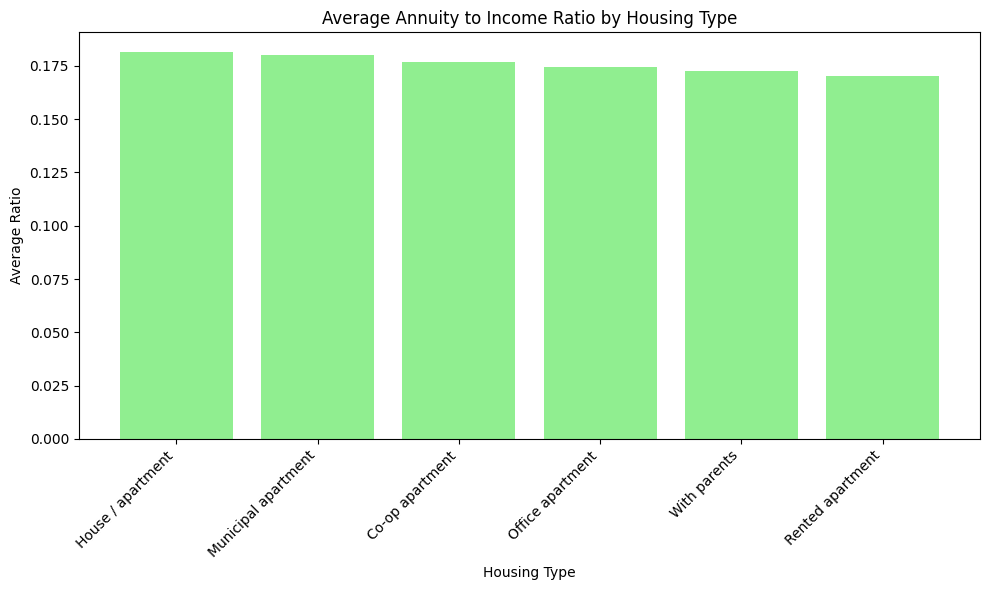

In [ ]:
###   46


df = df[(df['AMT_INCOME_TOTAL'] > 0) & df['AMT_ANNUITY'].notna() & df['AMT_INCOME_TOTAL'].notna()]


df['Annuity_Income_Ratio'] = df['AMT_ANNUITY'] / df['AMT_INCOME_TOTAL']


ratio_by_housing = df.groupby('NAME_HOUSING_TYPE')['Annuity_Income_Ratio'].mean().sort_values(ascending=False)

plt.figure(figsize=(10, 6))
plt.bar(ratio_by_housing.index, ratio_by_housing.values, color='lightgreen')
plt.title('Average Annuity to Income Ratio by Housing Type')
plt.ylabel('Average Ratio')
plt.xlabel('Housing Type')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


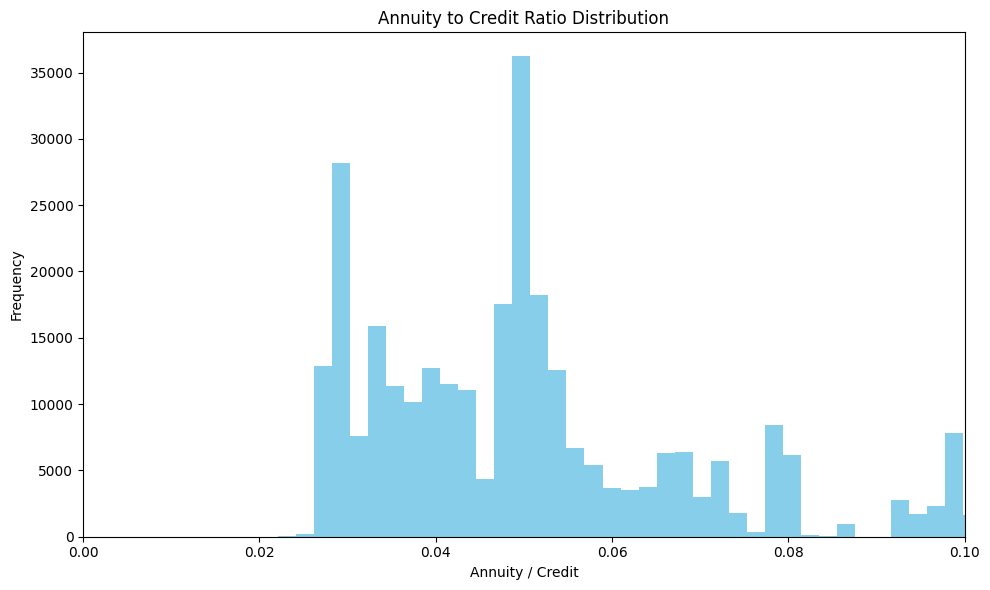

In [ ]:
#### 47


df = df[(df['AMT_CREDIT'] > 0) & (df['AMT_ANNUITY'].notna())]
df['Annuity_Credit_Ratio'] = df['AMT_ANNUITY'] / df['AMT_CREDIT']

plt.figure(figsize=(10, 6))
plt.hist(df['Annuity_Credit_Ratio'], bins=50, color='skyblue')
plt.title('Annuity to Credit Ratio Distribution')
plt.xlabel('Annuity / Credit')
plt.ylabel('Frequency')
plt.xlim(0, 0.1)  
plt.tight_layout()
plt.show()


C:\Users\DELL\AppData\Local\Temp\ipykernel_6048\3132657091.py:10: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped = df.groupby(['EXT_BIN', 'NAME_CONTRACT_TYPE'])['TARGET'].mean().reset_index()


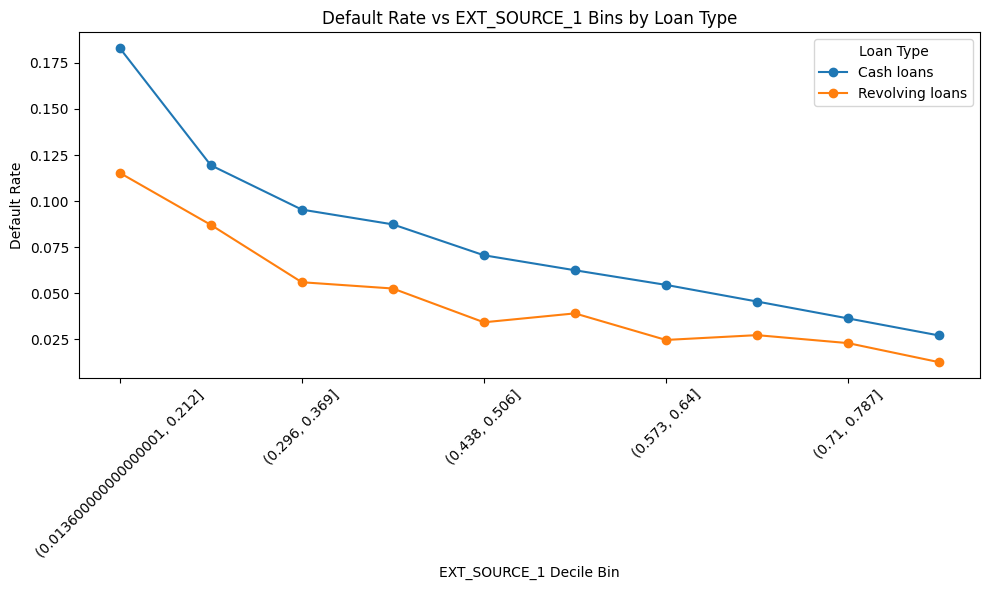

In [ ]:
####   48

df = df[df['EXT_SOURCE_1'].notna() & df['NAME_CONTRACT_TYPE'].notna()]


df['EXT_BIN'] = pd.qcut(df['EXT_SOURCE_1'], q=10, duplicates='drop')


grouped = df.groupby(['EXT_BIN', 'NAME_CONTRACT_TYPE'])['TARGET'].mean().reset_index()

pivot_df = grouped.pivot(index='EXT_BIN', columns='NAME_CONTRACT_TYPE', values='TARGET')

pivot_df.plot(kind='line', marker='o', figsize=(10, 6))
plt.title('Default Rate vs EXT_SOURCE_1 Bins by Loan Type')
plt.xlabel('EXT_SOURCE_1 Decile Bin')
plt.ylabel('Default Rate')
plt.xticks(rotation=45)
plt.legend(title='Loan Type')
plt.tight_layout()
plt.show()


C:\Users\DELL\AppData\Local\Temp\ipykernel_6048\3107654381.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  risky_df['AGE'] = -risky_df['DAYS_BIRTH'] / 365


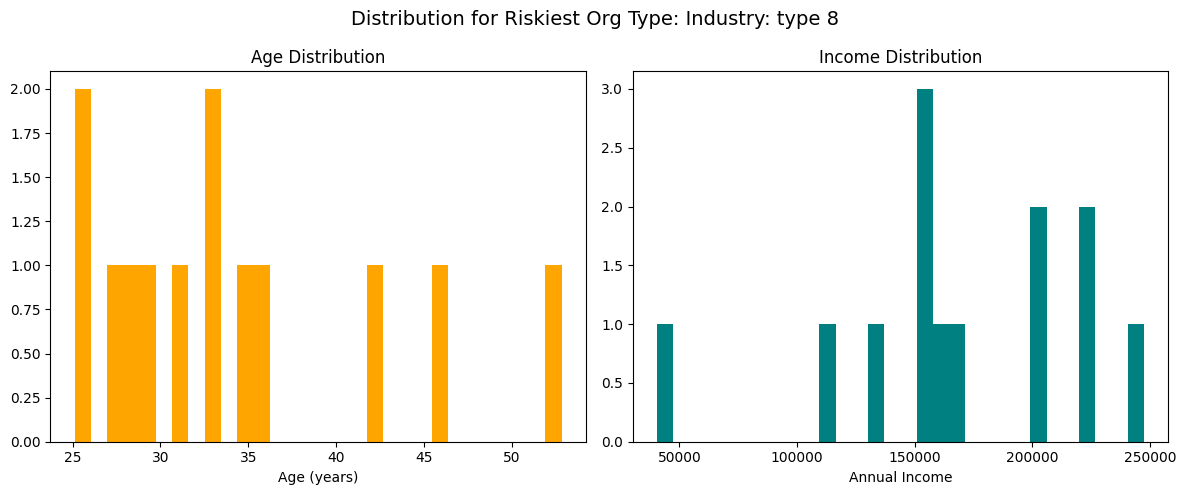

In [ ]:
### 49

df = df[df['ORGANIZATION_TYPE'].notna() & df['DAYS_BIRTH'].notna()]

riskiest_org = df.groupby('ORGANIZATION_TYPE')['TARGET'].mean().idxmax()


risky_df = df[df['ORGANIZATION_TYPE'] == riskiest_org]

risky_df['AGE'] = -risky_df['DAYS_BIRTH'] / 365

plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.hist(risky_df['AGE'], bins=30, color='orange')
plt.title('Age Distribution')
plt.xlabel('Age (years)')

plt.subplot(1, 2, 2)
plt.hist(risky_df['AMT_INCOME_TOTAL'], bins=30, color='teal')
plt.title('Income Distribution')
plt.xlabel('Annual Income')

plt.suptitle(f'Distribution for Riskiest Org Type: {riskiest_org}', fontsize=14)
plt.tight_layout()
plt.show()


In [17]:
pip install seaborn

Note: you may need to restart the kernel to use updated packages.


C:\Users\DELL\AppData\Local\Temp\ipykernel_6048\3822622209.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  risky_df['AGE'] = -risky_df['DAYS_BIRTH'] / 365


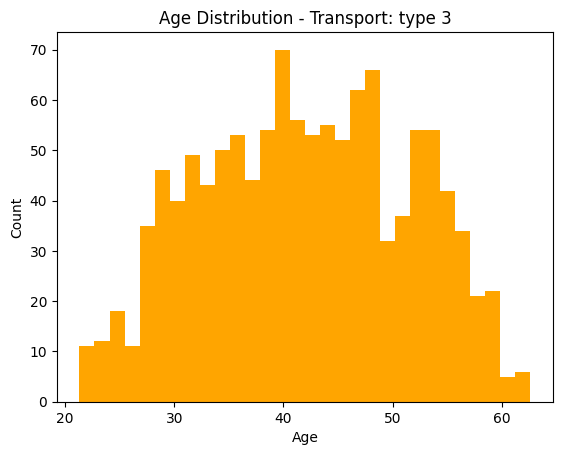

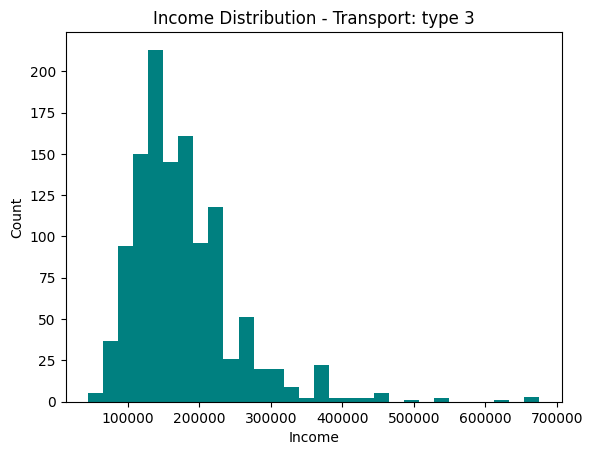

In [ ]:
###   50
df = df[['ORGANIZATION_TYPE', 'TARGET', 'DAYS_BIRTH', 'AMT_INCOME_TOTAL']].dropna()


riskiest_org = df.groupby('ORGANIZATION_TYPE')['TARGET'].mean().idxmax()

risky_df = df[df['ORGANIZATION_TYPE'] == riskiest_org]

risky_df['AGE'] = -risky_df['DAYS_BIRTH'] / 365

plt.hist(risky_df['AGE'], bins=30, color='orange')
plt.title(f'Age Distribution - {riskiest_org}')
plt.xlabel('Age')
plt.ylabel('Count')
plt.show()

plt.hist(risky_df['AMT_INCOME_TOTAL'], bins=30, color='teal')
plt.title(f'Income Distribution - {riskiest_org}')
plt.xlabel('Income')
plt.ylabel('Count')
plt.show()
